In [407]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
import json

In [ ]:
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 0


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
i = 0
with h5py.File("/content/drive/MyDrive/per-protein.h5", "r") as file:
    print(f"number of entries: {len(file.items())}")
    for sequence_id, embedding in file.items():
        i += 1
        print(
            f"  id: {sequence_id}, "
            f"  embeddings shape: {embedding.shape}, "
            f"  embeddings mean: {np.array(embedding).mean()}"
        )
        if i == 10:
          break

number of entries: 571272
  id: A0A009IHW8,   embeddings shape: (1024,),   embeddings mean: -0.0008711814880371094
  id: A0A011QK89,   embeddings shape: (1024,),   embeddings mean: -0.00095367431640625
  id: A0A017SE81,   embeddings shape: (1024,),   embeddings mean: -0.0003161430358886719
  id: A0A017SE85,   embeddings shape: (1024,),   embeddings mean: -0.0011615753173828125
  id: A0A017SEF3,   embeddings shape: (1024,),   embeddings mean: 0.0008940696716308594
  id: A0A017SEX7,   embeddings shape: (1024,),   embeddings mean: -0.00021350383758544922
  id: A0A017SEY2,   embeddings shape: (1024,),   embeddings mean: -0.0007681846618652344
  id: A0A017SFB8,   embeddings shape: (1024,),   embeddings mean: -0.0002608299255371094
  id: A0A017SGC7,   embeddings shape: (1024,),   embeddings mean: -0.00025343894958496094
  id: A0A017SP50,   embeddings shape: (1024,),   embeddings mean: 0.0007491111755371094


In [ ]:
json_path = "/content/drive/MyDrive/protein_props.json"
with open(json_path) as f:
  data = json.load(f)
len(data)

20434

In [ ]:
okk = pd.read_json(json_path)
properties = okk.transpose()

In [ ]:
druggable_data = "/content/drive/MyDrive/druggable_proteins.txt"
with open(druggable_data) as f:
  druggable_proteins = [line.strip() for line in f]
print(len(druggable_proteins))

approved_drugs = "/content/drive/MyDrive/approved_druggable_proteins.txt"
with open(approved_drugs) as g:
  approved_proteins = [line.strip() for line in g]
print(len(approved_proteins))

3345
2652


In [ ]:
properties

Sequence Sequence Length  \
A0A087X1C5  MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...             515   
A0A0B4J2F0  MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...              54   
A0A0B4J2F2  MVIMSEFSADPAGQGQGQQKPLRVGFYDIERTLGKGNFAVVKLARH...             783   
A0A0C5B5G6                                   MRWQEMGYIFYPRKLR              16   
A0A0K2S4Q6  MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...             201   
...                                                       ...             ...   
Q9UI54      MESPKCLYSRITVNTAFGTKFSHISFIILFKVFLFPRITISKKTKL...              55   
Q9UI72      MGMALELYWLCGFRSYWPLGTNAENEGNRKENRRQMQSRNERGCNV...              69   
Q9Y3F1      MSLLWTPQILTISFVSYILSLFPSPFPSCYTSCWFETSITTEKELN...              56   
Q9Y6C7      MAHHSLNTFYIWHNNVLHTHLVFFLPHLLNQPFSRGSFLIWLLLCW...              94   
Q9Y6Z2      MGTAVGPHHSPAPHDSALPARLLTSDFPYGRSCQIEQVKYSVPDTG...              57   

           Molecular Weight     GRAVY  \
A0A087X1C5       57488.0269 -0.016117   
A0A0B4J2F0        6313.3024 -0.235185   
A0A0B4J2F2       84929.1856 -0.197957   
A0A0C5B5G6        2174.5917   -0.9375   
A0A0K2S4Q6       21805.9293   0.10796   
...                     ...       ...   
Q9UI54             6386.613  0.303636   
Q9UI72            8249.2539 -1.015942   
Q9Y3F1            6534.5215  0.444643   
Q9Y6C7           11023.7471 -0.029787   
Q9Y6Z2            6188.8293 -0.421053   

                                             Amino Acid Count  \
A0A087X1C5  {'A': 42, 'C': 9, 'D': 23, 'E': 28, 'F': 31, '...   
A0A0B4J2F0  {'A': 4, 'C': 0, 'D': 1, 'E': 6, 'F': 5, 'G': ...   
A0A0B4J2F2  {'A': 66, 'C': 19, 'D': 30, 'E': 43, 'F': 28, ...   
A0A0C5B5G6  {'A': 0, 'C': 0, 'D': 0, 'E': 1, 'F': 1, 'G': ...   
A0A0K2S4Q6  {'A': 11, 'C': 8, 'D': 7, 'E': 10, 'F': 6, 'G'...   
...                                                       ...   
Q9UI54      {'A': 1, 'C': 1, 'D': 0, 'E': 1, 'F': 6, 'G': ...   
Q9UI72      {'A': 4, 'C': 3, 'D': 2, 'E': 6, 'F': 2, 'G': ...   
Q9Y3F1      {'A': 2, 'C': 2, 'D': 0, 'E': 4, 'F': 6, 'G': ...   
Q9Y6C7      {'A': 4, 'C': 2, 'D': 1, 'E': 1, 'F': 5, 'G': ...   
Q9Y6Z2      {'A': 4, 'C': 1, 'D': 3, 'E': 2, 'F': 2, 'G': ...   

                                           Amino Acid Percent  \
A0A087X1C5  {'A': 0.081553398058252, 'C': 0.01747572815533...   
A0A0B4J2F0  {'A': 0.074074074074074, 'C': 0.0, 'D': 0.0185...   
A0A0B4J2F2  {'A': 0.08429118773946301, 'C': 0.024265644955...   
A0A0C5B5G6  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0625, 'F...   
A0A0K2S4Q6  {'A': 0.054726368159203, 'C': 0.03980099502487...   
...                                                       ...   
Q9UI54      {'A': 0.018181818181818, 'C': 0.01818181818181...   
Q9UI72      {'A': 0.057971014492753006, 'C': 0.04347826086...   
Q9Y3F1      {'A': 0.035714285714285005, 'C': 0.03571428571...   
Q9Y6C7      {'A': 0.042553191489361, 'C': 0.02127659574468...   
Q9Y6Z2      {'A': 0.070175438596491, 'C': 0.01754385964912...   

           Molar Extinction Coefficient Isoelectric Point Instability Index  \
A0A087X1C5               [47440, 47940]          8.703506         45.155922   
A0A0B4J2F0                 [2980, 2980]           8.03542         55.518519   
A0A0B4J2F2               [56840, 57965]          6.813029         59.277803   
A0A0C5B5G6                 [8480, 8480]         10.266413         77.300625   
A0A0K2S4Q6               [33460, 33960]          5.366988         41.796517   
...                                 ...               ...               ...   
Q9UI54                     [2980, 2980]         10.302902         35.789091   
Q9UI72                   [15470, 15595]          9.348383         46.171014   
Q9Y3F1                   [15470, 15595]          4.493088            69.675   
Q9Y6C7                   [24980, 25105]         10.192468         62.375638   
Q9Y6Z2                     [8480, 8480]          5.982781              50.3   

           Aromaticity                                Secondary Structure  \

In [ ]:
embeddings = []
embedding_means = []

with h5py.File("/content/drive/MyDrive/per-protein.h5", "r") as file:
    for protein_id in properties.index:
        if protein_id in file:
            embedding = file[protein_id][()]
            embedding_mean = embedding.mean()
        else:
            embedding = np.nan
            embedding_mean = np.nan
        embeddings.append(embedding)
        embedding_means.append(embedding_mean)

# Add the embeddings and embedding means as new columns to the DataFrame
properties['embeddings'] = embeddings
properties['embedding_mean'] = embedding_means

In [ ]:
properties

Sequence Sequence Length  \
A0A087X1C5  MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...             515   
A0A0B4J2F0  MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...              54   
A0A0B4J2F2  MVIMSEFSADPAGQGQGQQKPLRVGFYDIERTLGKGNFAVVKLARH...             783   
A0A0C5B5G6                                   MRWQEMGYIFYPRKLR              16   
A0A0K2S4Q6  MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...             201   
...                                                       ...             ...   
Q9UI54      MESPKCLYSRITVNTAFGTKFSHISFIILFKVFLFPRITISKKTKL...              55   
Q9UI72      MGMALELYWLCGFRSYWPLGTNAENEGNRKENRRQMQSRNERGCNV...              69   
Q9Y3F1      MSLLWTPQILTISFVSYILSLFPSPFPSCYTSCWFETSITTEKELN...              56   
Q9Y6C7      MAHHSLNTFYIWHNNVLHTHLVFFLPHLLNQPFSRGSFLIWLLLCW...              94   
Q9Y6Z2      MGTAVGPHHSPAPHDSALPARLLTSDFPYGRSCQIEQVKYSVPDTG...              57   

           Molecular Weight     GRAVY  \
A0A087X1C5       57488.0269 -0.016117   
A0A0B4J2F0        6313.3024 -0.235185   
A0A0B4J2F2       84929.1856 -0.197957   
A0A0C5B5G6        2174.5917   -0.9375   
A0A0K2S4Q6       21805.9293   0.10796   
...                     ...       ...   
Q9UI54             6386.613  0.303636   
Q9UI72            8249.2539 -1.015942   
Q9Y3F1            6534.5215  0.444643   
Q9Y6C7           11023.7471 -0.029787   
Q9Y6Z2            6188.8293 -0.421053   

                                             Amino Acid Count  \
A0A087X1C5  {'A': 42, 'C': 9, 'D': 23, 'E': 28, 'F': 31, '...   
A0A0B4J2F0  {'A': 4, 'C': 0, 'D': 1, 'E': 6, 'F': 5, 'G': ...   
A0A0B4J2F2  {'A': 66, 'C': 19, 'D': 30, 'E': 43, 'F': 28, ...   
A0A0C5B5G6  {'A': 0, 'C': 0, 'D': 0, 'E': 1, 'F': 1, 'G': ...   
A0A0K2S4Q6  {'A': 11, 'C': 8, 'D': 7, 'E': 10, 'F': 6, 'G'...   
...                                                       ...   
Q9UI54      {'A': 1, 'C': 1, 'D': 0, 'E': 1, 'F': 6, 'G': ...   
Q9UI72      {'A': 4, 'C': 3, 'D': 2, 'E': 6, 'F': 2, 'G': ...   
Q9Y3F1      {'A': 2, 'C': 2, 'D': 0, 'E': 4, 'F': 6, 'G': ...   
Q9Y6C7      {'A': 4, 'C': 2, 'D': 1, 'E': 1, 'F': 5, 'G': ...   
Q9Y6Z2      {'A': 4, 'C': 1, 'D': 3, 'E': 2, 'F': 2, 'G': ...   

                                           Amino Acid Percent  \
A0A087X1C5  {'A': 0.081553398058252, 'C': 0.01747572815533...   
A0A0B4J2F0  {'A': 0.074074074074074, 'C': 0.0, 'D': 0.0185...   
A0A0B4J2F2  {'A': 0.08429118773946301, 'C': 0.024265644955...   
A0A0C5B5G6  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0625, 'F...   
A0A0K2S4Q6  {'A': 0.054726368159203, 'C': 0.03980099502487...   
...                                                       ...   
Q9UI54      {'A': 0.018181818181818, 'C': 0.01818181818181...   
Q9UI72      {'A': 0.057971014492753006, 'C': 0.04347826086...   
Q9Y3F1      {'A': 0.035714285714285005, 'C': 0.03571428571...   
Q9Y6C7      {'A': 0.042553191489361, 'C': 0.02127659574468...   
Q9Y6Z2      {'A': 0.070175438596491, 'C': 0.01754385964912...   

           Molar Extinction Coefficient Isoelectric Point Instability Index  \
A0A087X1C5               [47440, 47940]          8.703506         45.155922   
A0A0B4J2F0                 [2980, 2980]           8.03542         55.518519   
A0A0B4J2F2               [56840, 57965]          6.813029         59.277803   
A0A0C5B5G6                 [8480, 8480]         10.266413         77.300625   
A0A0K2S4Q6               [33460, 33960]          5.366988         41.796517   
...                                 ...               ...               ...   
Q9UI54                     [2980, 2980]         10.302902         35.789091   
Q9UI72                   [15470, 15595]          9.348383         46.171014   
Q9Y3F1                   [15470, 15595]          4.493088            69.675   
Q9Y6C7                   [24980, 25105]         10.192468         62.375638   
Q9Y6Z2                     [8480, 8480]          5.982781              50.3   

           Aromaticity                                Secondary Structure  \

In [ ]:
properties.isna().sum()

Sequence                        0
Sequence Length                 0
Molecular Weight                0
GRAVY                           0
Amino Acid Count                0
Amino Acid Percent              0
Molar Extinction Coefficient    0
Isoelectric Point               0
Instability Index               0
Aromaticity                     0
Secondary Structure             0
Flexibility                     0
Charge at 7                     0
embeddings                      3
embedding_mean                  3
dtype: int64

In [ ]:
properties.dropna(inplace = True)
properties.isna().sum()

Sequence                        0
Sequence Length                 0
Molecular Weight                0
GRAVY                           0
Amino Acid Count                0
Amino Acid Percent              0
Molar Extinction Coefficient    0
Isoelectric Point               0
Instability Index               0
Aromaticity                     0
Secondary Structure             0
Flexibility                     0
Charge at 7                     0
embeddings                      0
embedding_mean                  0
dtype: int64

In [ ]:
is_druggable = []
for i in properties.index:
  if i in druggable_proteins:
    is_druggable.append(1)
  else:
    is_druggable.append(0)

approved_drugs = []
for j in properties.index:
  if j in approved_proteins:
    approved_drugs.append(1)
  else:
    approved_drugs.append(0)

properties['is_druggable'] = is_druggable
properties['is_approved'] = approved_drugs
properties


Sequence Sequence Length  \
A0A087X1C5  MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...             515   
A0A0B4J2F0  MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...              54   
A0A0B4J2F2  MVIMSEFSADPAGQGQGQQKPLRVGFYDIERTLGKGNFAVVKLARH...             783   
A0A0C5B5G6                                   MRWQEMGYIFYPRKLR              16   
A0A0K2S4Q6  MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...             201   
...                                                       ...             ...   
Q9UI54      MESPKCLYSRITVNTAFGTKFSHISFIILFKVFLFPRITISKKTKL...              55   
Q9UI72      MGMALELYWLCGFRSYWPLGTNAENEGNRKENRRQMQSRNERGCNV...              69   
Q9Y3F1      MSLLWTPQILTISFVSYILSLFPSPFPSCYTSCWFETSITTEKELN...              56   
Q9Y6C7      MAHHSLNTFYIWHNNVLHTHLVFFLPHLLNQPFSRGSFLIWLLLCW...              94   
Q9Y6Z2      MGTAVGPHHSPAPHDSALPARLLTSDFPYGRSCQIEQVKYSVPDTG...              57   

           Molecular Weight     GRAVY  \
A0A087X1C5       57488.0269 -0.016117   
A0A0B4J2F0        6313.3024 -0.235185   
A0A0B4J2F2       84929.1856 -0.197957   
A0A0C5B5G6        2174.5917   -0.9375   
A0A0K2S4Q6       21805.9293   0.10796   
...                     ...       ...   
Q9UI54             6386.613  0.303636   
Q9UI72            8249.2539 -1.015942   
Q9Y3F1            6534.5215  0.444643   
Q9Y6C7           11023.7471 -0.029787   
Q9Y6Z2            6188.8293 -0.421053   

                                             Amino Acid Count  \
A0A087X1C5  {'A': 42, 'C': 9, 'D': 23, 'E': 28, 'F': 31, '...   
A0A0B4J2F0  {'A': 4, 'C': 0, 'D': 1, 'E': 6, 'F': 5, 'G': ...   
A0A0B4J2F2  {'A': 66, 'C': 19, 'D': 30, 'E': 43, 'F': 28, ...   
A0A0C5B5G6  {'A': 0, 'C': 0, 'D': 0, 'E': 1, 'F': 1, 'G': ...   
A0A0K2S4Q6  {'A': 11, 'C': 8, 'D': 7, 'E': 10, 'F': 6, 'G'...   
...                                                       ...   
Q9UI54      {'A': 1, 'C': 1, 'D': 0, 'E': 1, 'F': 6, 'G': ...   
Q9UI72      {'A': 4, 'C': 3, 'D': 2, 'E': 6, 'F': 2, 'G': ...   
Q9Y3F1      {'A': 2, 'C': 2, 'D': 0, 'E': 4, 'F': 6, 'G': ...   
Q9Y6C7      {'A': 4, 'C': 2, 'D': 1, 'E': 1, 'F': 5, 'G': ...   
Q9Y6Z2      {'A': 4, 'C': 1, 'D': 3, 'E': 2, 'F': 2, 'G': ...   

                                           Amino Acid Percent  \
A0A087X1C5  {'A': 0.081553398058252, 'C': 0.01747572815533...   
A0A0B4J2F0  {'A': 0.074074074074074, 'C': 0.0, 'D': 0.0185...   
A0A0B4J2F2  {'A': 0.08429118773946301, 'C': 0.024265644955...   
A0A0C5B5G6  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0625, 'F...   
A0A0K2S4Q6  {'A': 0.054726368159203, 'C': 0.03980099502487...   
...                                                       ...   
Q9UI54      {'A': 0.018181818181818, 'C': 0.01818181818181...   
Q9UI72      {'A': 0.057971014492753006, 'C': 0.04347826086...   
Q9Y3F1      {'A': 0.035714285714285005, 'C': 0.03571428571...   
Q9Y6C7      {'A': 0.042553191489361, 'C': 0.02127659574468...   
Q9Y6Z2      {'A': 0.070175438596491, 'C': 0.01754385964912...   

           Molar Extinction Coefficient Isoelectric Point Instability Index  \
A0A087X1C5               [47440, 47940]          8.703506         45.155922   
A0A0B4J2F0                 [2980, 2980]           8.03542         55.518519   
A0A0B4J2F2               [56840, 57965]          6.813029         59.277803   
A0A0C5B5G6                 [8480, 8480]         10.266413         77.300625   
A0A0K2S4Q6               [33460, 33960]          5.366988         41.796517   
...                                 ...               ...               ...   
Q9UI54                     [2980, 2980]         10.302902         35.789091   
Q9UI72                   [15470, 15595]          9.348383         46.171014   
Q9Y3F1                   [15470, 15595]          4.493088            69.675   
Q9Y6C7                   [24980, 25105]         10.192468         62.375638   
Q9Y6Z2                     [8480, 8480]          5.982781              50.3   

           Aromaticity                                Secondary Structure  \

In [ ]:
#lets see how well embeddings alone can identify druggable or not

embeddings_data = pd.DataFrame({'embeddings': properties['embeddings'], 'is_druggable':properties['is_druggable'] })
embeddings_data

embeddings  is_druggable
A0A087X1C5  [0.004597, 0.0673, 0.001243, -0.02876, -0.0549...             0
A0A0B4J2F0  [0.0575, -0.04382, -0.003994, -0.00574, 0.0502...             0
A0A0B4J2F2  [0.00659, 0.02846, 0.01593, 0.002148, -0.03137...             0
A0A0C5B5G6  [0.11304, 0.04965, -0.11035, -0.1404, 0.02875,...             0
A0A0K2S4Q6  [-0.012955, 0.02867, 0.06024, 0.01366, -0.0169...             0
...                                                       ...           ...
Q9UI54      [0.0974, 0.0672, -0.0671, -0.01249, -0.05167, ...             0
Q9UI72      [0.04962, 0.05548, 0.03693, -0.006916, -0.0482...             0
Q9Y3F1      [0.05945, 0.1229, -0.04916, 0.02313, -0.1155, ...             0
Q9Y6C7      [0.01464, 0.0842, 0.01442, 0.0569, -0.0837, -0...             0
Q9Y6Z2      [0.0833, 0.06274, -0.005722, -0.01752, -0.1235...             0

[20431 rows x 2 columns]

In [ ]:
embeddings = np.array(properties['embeddings'].tolist(), dtype = np.float32)
druggable = np.array(properties['is_druggable'].values , dtype = np.float32)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input

input_shape = (1024,)
inputs = Input(shape=input_shape)

x = Dense(512, activation='relu')(inputs)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
hidden_output = Dense(10, activation='relu', name='hidden_output')(x)  # Output of the last hidden layer

output = Dense(1, activation='sigmoid')(hidden_output)

# Full model
model = Model(inputs=inputs, outputs=output)

# Extraction of  hidden layer output model
hidden_output_model = Model(inputs=inputs, outputs=hidden_output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_65 (Dense)            (None, 512)               524800    
                                                                 
 dropout_53 (Dropout)        (None, 512)               0         
                                                                 
 dense_66 (Dense)            (None, 256)               131328    
                                                                 
 dropout_54 (Dropout)        (None, 256)               0         
                                                                 
 dense_67 (Dense)            (None, 128)               32896     
                                                                 
 dropout_55 (Dropout)        (None, 128)               0   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, druggable, test_size=0.2, random_state=42)

In [ ]:
def test_results(y_pred, y_test):
    results = {}
    results['Accuracy'] = accuracy_score(y_test,y_pred)
    results['Precision'] = precision_score(y_test,y_pred,average = 'weighted')
    results['Recall'] = recall_score(y_test,y_pred,average = 'weighted')
    results['F1_Score'] = f1_score(y_test,y_pred,average = 'weighted')
    results['ROC_AUC'] = calculate_roc_auc(y_test, y_pred)

    cm = confusion_matrix(y_test,y_pred)
    return results, cm

In [ ]:
def calculate_roc_auc(y_true, y_pred):
    auc = roc_auc_score(y_true, y_pred)
    return auc

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
511/511 [==============================] - 10s 16ms/step - loss: 0.3613 - accuracy: 0.8435 - val_loss: 0.3080 - val_accuracy: 0.8703
Epoch 2/20
511/511 [==============================] - 6s 12ms/step - loss: 0.3251 - accuracy: 0.8626 - val_loss: 0.2955 - val_accuracy: 0.8772
Epoch 3/20
511/511 [==============================] - 8s 15ms/step - loss: 0.3087 - accuracy: 0.8683 - val_loss: 0.2883 - val_accuracy: 0.8777
Epoch 4/20
511/511 [==============================] - 6s 12ms/step - loss: 0.2982 - accuracy: 0.8770 - val_loss: 0.3186 - val_accuracy: 0.8493
Epoch 5/20
511/511 [==============================] - 7s 13ms/step - loss: 0.2888 - accuracy: 0.8788 - val_loss: 0.2789 - val_accuracy: 0.8838
Epoch 6/20
511/511 [==============================] - 6s 12ms/step - loss: 0.2776 - accuracy: 0.8845 - val_loss: 0.2822 - val_accuracy: 0.8850
Epoch 7/20
511/511 [==============================] - 7s 14ms/step - loss: 0.2750 - accuracy: 0.8837 - val_loss: 0.2845 - val_accuracy: 0.879

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
metrics,cm = test_results(y_pred,y_test)

128/128 [==============================] - 1s 3ms/step


In [ ]:
metrics

{'Accuracy': 0.8879373623684854,
 'Precision': 0.881596176093727,
 'Recall': 0.8879373623684854,
 'F1_Score': 0.8836243415980379,
 'ROC_AUC': 0.7629621367339954}

In [ ]:
cm

array([[3239,  171],
       [ 287,  390]])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

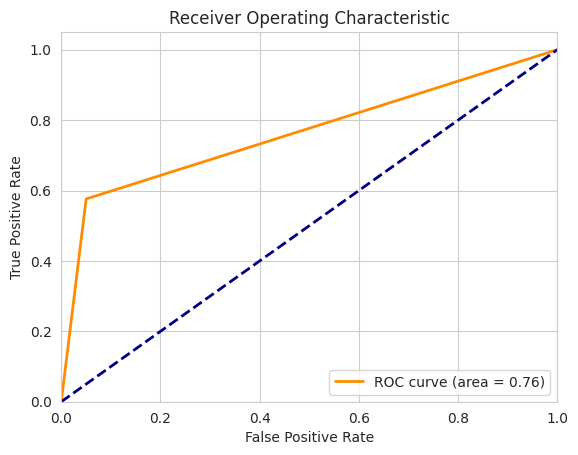

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % metrics['ROC_AUC'])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X_train_reshaped = np.expand_dims(X_train[1000], axis=0)
hidden_layer_output = hidden_output_model.predict(X_train_reshaped)

1/1 [==============================] - 0s 41ms/step


In [ ]:
hidden_layer_output

array([[0.       , 0.       , 0.       , 0.       , 8.708379 , 0.       ,
        0.       , 1.167006 , 4.4068747, 0.       ]], dtype=float32)

In [ ]:
def extraction(x):
  x_reshaped = np.expand_dims(x, axis = 0)
  hidden_layer_output = hidden_output_model.predict(x_reshaped)
  return hidden_layer_output

In [ ]:
embeddings_data['Extracted_Embeddings'] = embeddings_data['embeddings'].apply(extraction)

In [321]:
# Saving DataFrame to a CSV file
embeddings_data.to_csv('embeddings_data.csv', index=False)

In [322]:
properties['extracted_embeddings'] = embeddings_data['Extracted_Embeddings']
properties

Sequence Sequence Length  \
A0A087X1C5  MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...             515   
A0A0B4J2F0  MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...              54   
A0A0B4J2F2  MVIMSEFSADPAGQGQGQQKPLRVGFYDIERTLGKGNFAVVKLARH...             783   
A0A0C5B5G6                                   MRWQEMGYIFYPRKLR              16   
A0A0K2S4Q6  MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...             201   
...                                                       ...             ...   
Q9UI54      MESPKCLYSRITVNTAFGTKFSHISFIILFKVFLFPRITISKKTKL...              55   
Q9UI72      MGMALELYWLCGFRSYWPLGTNAENEGNRKENRRQMQSRNERGCNV...              69   
Q9Y3F1      MSLLWTPQILTISFVSYILSLFPSPFPSCYTSCWFETSITTEKELN...              56   
Q9Y6C7      MAHHSLNTFYIWHNNVLHTHLVFFLPHLLNQPFSRGSFLIWLLLCW...              94   
Q9Y6Z2      MGTAVGPHHSPAPHDSALPARLLTSDFPYGRSCQIEQVKYSVPDTG...              57   

           Molecular Weight     GRAVY  \
A0A087X1C5       57488.0269 -0.016117   
A0A0B4J2F0        6313.3024 -0.235185   
A0A0B4J2F2       84929.1856 -0.197957   
A0A0C5B5G6        2174.5917   -0.9375   
A0A0K2S4Q6       21805.9293   0.10796   
...                     ...       ...   
Q9UI54             6386.613  0.303636   
Q9UI72            8249.2539 -1.015942   
Q9Y3F1            6534.5215  0.444643   
Q9Y6C7           11023.7471 -0.029787   
Q9Y6Z2            6188.8293 -0.421053   

                                             Amino Acid Count  \
A0A087X1C5  {'A': 42, 'C': 9, 'D': 23, 'E': 28, 'F': 31, '...   
A0A0B4J2F0  {'A': 4, 'C': 0, 'D': 1, 'E': 6, 'F': 5, 'G': ...   
A0A0B4J2F2  {'A': 66, 'C': 19, 'D': 30, 'E': 43, 'F': 28, ...   
A0A0C5B5G6  {'A': 0, 'C': 0, 'D': 0, 'E': 1, 'F': 1, 'G': ...   
A0A0K2S4Q6  {'A': 11, 'C': 8, 'D': 7, 'E': 10, 'F': 6, 'G'...   
...                                                       ...   
Q9UI54      {'A': 1, 'C': 1, 'D': 0, 'E': 1, 'F': 6, 'G': ...   
Q9UI72      {'A': 4, 'C': 3, 'D': 2, 'E': 6, 'F': 2, 'G': ...   
Q9Y3F1      {'A': 2, 'C': 2, 'D': 0, 'E': 4, 'F': 6, 'G': ...   
Q9Y6C7      {'A': 4, 'C': 2, 'D': 1, 'E': 1, 'F': 5, 'G': ...   
Q9Y6Z2      {'A': 4, 'C': 1, 'D': 3, 'E': 2, 'F': 2, 'G': ...   

                                           Amino Acid Percent  \
A0A087X1C5  {'A': 0.081553398058252, 'C': 0.01747572815533...   
A0A0B4J2F0  {'A': 0.074074074074074, 'C': 0.0, 'D': 0.0185...   
A0A0B4J2F2  {'A': 0.08429118773946301, 'C': 0.024265644955...   
A0A0C5B5G6  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0625, 'F...   
A0A0K2S4Q6  {'A': 0.054726368159203, 'C': 0.03980099502487...   
...                                                       ...   
Q9UI54      {'A': 0.018181818181818, 'C': 0.01818181818181...   
Q9UI72      {'A': 0.057971014492753006, 'C': 0.04347826086...   
Q9Y3F1      {'A': 0.035714285714285005, 'C': 0.03571428571...   
Q9Y6C7      {'A': 0.042553191489361, 'C': 0.02127659574468...   
Q9Y6Z2      {'A': 0.070175438596491, 'C': 0.01754385964912...   

           Molar Extinction Coefficient Isoelectric Point Instability Index  \
A0A087X1C5               [47440, 47940]          8.703506         45.155922   
A0A0B4J2F0                 [2980, 2980]           8.03542         55.518519   
A0A0B4J2F2               [56840, 57965]          6.813029         59.277803   
A0A0C5B5G6                 [8480, 8480]         10.266413         77.300625   
A0A0K2S4Q6               [33460, 33960]          5.366988         41.796517   
...                                 ...               ...               ...   
Q9UI54                     [2980, 2980]         10.302902         35.789091   
Q9UI72                   [15470, 15595]          9.348383         46.171014   
Q9Y3F1                   [15470, 15595]          4.493088            69.675   
Q9Y6C7                   [24980, 25105]         10.192468         62.375638   
Q9Y6Z2                     [8480, 8480]          5.982781              50.3   

           Aromaticity                                Secondary Structure  \

In [324]:
properties['extracted_embeddings'][0][0].shape

(10,)

In [330]:
for i in range(10):
  properties[f'embeddings_{i}'] = pd.Series([0]*properties.shape[0])
for j in range(properties.shape[0]):
  for n,k in enumerate(properties['extracted_embeddings'][j][0]):
    properties[f'embeddings_{n}'][j] = k

properties



<ipython-input-330-d11a128ddcc3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties[f'embeddings_{n}'][j] = k


Sequence Sequence Length  \
A0A087X1C5  MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...             515   
A0A0B4J2F0  MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...              54   
A0A0B4J2F2  MVIMSEFSADPAGQGQGQQKPLRVGFYDIERTLGKGNFAVVKLARH...             783   
A0A0C5B5G6                                   MRWQEMGYIFYPRKLR              16   
A0A0K2S4Q6  MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...             201   
...                                                       ...             ...   
Q9UI54      MESPKCLYSRITVNTAFGTKFSHISFIILFKVFLFPRITISKKTKL...              55   
Q9UI72      MGMALELYWLCGFRSYWPLGTNAENEGNRKENRRQMQSRNERGCNV...              69   
Q9Y3F1      MSLLWTPQILTISFVSYILSLFPSPFPSCYTSCWFETSITTEKELN...              56   
Q9Y6C7      MAHHSLNTFYIWHNNVLHTHLVFFLPHLLNQPFSRGSFLIWLLLCW...              94   
Q9Y6Z2      MGTAVGPHHSPAPHDSALPARLLTSDFPYGRSCQIEQVKYSVPDTG...              57   

           Molecular Weight     GRAVY  \
A0A087X1C5       57488.0269 -0.016117   
A0A0B4J2F0        6313.3024 -0.235185   
A0A0B4J2F2       84929.1856 -0.197957   
A0A0C5B5G6        2174.5917   -0.9375   
A0A0K2S4Q6       21805.9293   0.10796   
...                     ...       ...   
Q9UI54             6386.613  0.303636   
Q9UI72            8249.2539 -1.015942   
Q9Y3F1            6534.5215  0.444643   
Q9Y6C7           11023.7471 -0.029787   
Q9Y6Z2            6188.8293 -0.421053   

                                             Amino Acid Count  \
A0A087X1C5  {'A': 42, 'C': 9, 'D': 23, 'E': 28, 'F': 31, '...   
A0A0B4J2F0  {'A': 4, 'C': 0, 'D': 1, 'E': 6, 'F': 5, 'G': ...   
A0A0B4J2F2  {'A': 66, 'C': 19, 'D': 30, 'E': 43, 'F': 28, ...   
A0A0C5B5G6  {'A': 0, 'C': 0, 'D': 0, 'E': 1, 'F': 1, 'G': ...   
A0A0K2S4Q6  {'A': 11, 'C': 8, 'D': 7, 'E': 10, 'F': 6, 'G'...   
...                                                       ...   
Q9UI54      {'A': 1, 'C': 1, 'D': 0, 'E': 1, 'F': 6, 'G': ...   
Q9UI72      {'A': 4, 'C': 3, 'D': 2, 'E': 6, 'F': 2, 'G': ...   
Q9Y3F1      {'A': 2, 'C': 2, 'D': 0, 'E': 4, 'F': 6, 'G': ...   
Q9Y6C7      {'A': 4, 'C': 2, 'D': 1, 'E': 1, 'F': 5, 'G': ...   
Q9Y6Z2      {'A': 4, 'C': 1, 'D': 3, 'E': 2, 'F': 2, 'G': ...   

                                           Amino Acid Percent  \
A0A087X1C5  {'A': 0.081553398058252, 'C': 0.01747572815533...   
A0A0B4J2F0  {'A': 0.074074074074074, 'C': 0.0, 'D': 0.0185...   
A0A0B4J2F2  {'A': 0.08429118773946301, 'C': 0.024265644955...   
A0A0C5B5G6  {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0625, 'F...   
A0A0K2S4Q6  {'A': 0.054726368159203, 'C': 0.03980099502487...   
...                                                       ...   
Q9UI54      {'A': 0.018181818181818, 'C': 0.01818181818181...   
Q9UI72      {'A': 0.057971014492753006, 'C': 0.04347826086...   
Q9Y3F1      {'A': 0.035714285714285005, 'C': 0.03571428571...   
Q9Y6C7      {'A': 0.042553191489361, 'C': 0.02127659574468...   
Q9Y6Z2      {'A': 0.070175438596491, 'C': 0.01754385964912...   

           Molar Extinction Coefficient Isoelectric Point Instability Index  \
A0A087X1C5               [47440, 47940]          8.703506         45.155922   
A0A0B4J2F0                 [2980, 2980]           8.03542         55.518519   
A0A0B4J2F2               [56840, 57965]          6.813029         59.277803   
A0A0C5B5G6                 [8480, 8480]         10.266413         77.300625   
A0A0K2S4Q6               [33460, 33960]          5.366988         41.796517   
...                                 ...               ...               ...   
Q9UI54                     [2980, 2980]         10.302902         35.789091   
Q9UI72                   [15470, 15595]          9.348383         46.171014   
Q9Y3F1                   [15470, 15595]          4.493088            69.675   
Q9Y6C7                   [24980, 25105]         10.192468         62.375638   
Q9Y6Z2                     [8480, 8480]          5.982781              50.3   

           Aromaticity  ... embeddings_0 embeddings_1 embeddings_2  \
A0A087

In [331]:
properties.to_csv('properties.csv')

In [333]:
index = 'A C D E F G H I K L M N P Q R S T V W Y'
for i in index.split(" "):
  properties[f"Amino_Acid_{i}_Percent"] = pd.Series([0]*properties.shape[0])
properties['Molar Extinction Coefficient 1'] = pd.Series([0]*properties.shape[0])
properties['Molar Extinction Coefficient 2'] = pd.Series([0]*properties.shape[0])
properties['Secondary Structure helix'] = pd.Series([0]*properties.shape[0])
properties['Secondary Structure turn'] = pd.Series([0]*properties.shape[0])
properties['Secondary Structure sheet'] = pd.Series([0]*properties.shape[0])
for i in range(properties.shape[0]):
  for j,k in properties['Amino Acid Percent'][i].items():
    properties[f"Amino_Acid_{j}_Percent"][i] = k
  properties['Molar Extinction Coefficient 1'][i] = properties['Molar Extinction Coefficient'][i][0]
  properties['Molar Extinction Coefficient 2'][i] = properties['Molar Extinction Coefficient'][i][1]
  properties['Secondary Structure helix'][i] = properties['Secondary Structure'][i][0]
  properties['Secondary Structure turn'][i] = properties['Secondary Structure'][i][1]
  properties['Secondary Structure sheet'][i] = properties['Secondary Structure'][i][2]
properties.drop(columns = ['Sequence','Sequence Length','Amino Acid Count','Amino Acid Percent','Molar Extinction Coefficient','Secondary Structure','embeddings','extracted_embeddings'],axis = 1, inplace = True)

<ipython-input-333-72100af66ab1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties[f"Amino_Acid_{j}_Percent"][i] = k
<ipython-input-333-72100af66ab1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['Molar Extinction Coefficient 1'][i] = properties['Molar Extinction Coefficient'][i][0]
<ipython-input-333-72100af66ab1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['Molar Extinction Coefficient 2'][i

In [335]:
properties

Molecular Weight     GRAVY Isoelectric Point Instability Index  \
A0A087X1C5       57488.0269 -0.016117          8.703506         45.155922   
A0A0B4J2F0        6313.3024 -0.235185           8.03542         55.518519   
A0A0B4J2F2       84929.1856 -0.197957          6.813029         59.277803   
A0A0C5B5G6        2174.5917   -0.9375         10.266413         77.300625   
A0A0K2S4Q6       21805.9293   0.10796          5.366988         41.796517   
...                     ...       ...               ...               ...   
Q9UI54             6386.613  0.303636         10.302902         35.789091   
Q9UI72            8249.2539 -1.015942          9.348383         46.171014   
Q9Y3F1            6534.5215  0.444643          4.493088            69.675   
Q9Y6C7           11023.7471 -0.029787         10.192468         62.375638   
Q9Y6Z2            6188.8293 -0.421053          5.982781              50.3   

           Aromaticity                                        Flexibility  \
A0A087X1C5    0.085437  [0.977440476190476, 0.9806071428571421, 0.9983...   
A0A0B4J2F0     0.12963  [0.982095238095238, 0.95625, 0.983214285714285...   
A0A0B4J2F2    0.063857  [1.00125, 0.970071428571428, 1.034523809523809...   
A0A0C5B5G6        0.25  [0.9704047619047621, 1.00345238095238, 0.95860...   
A0A0K2S4Q6    0.074627  [1.008285714285714, 0.9868928571428571, 0.991,...   
...                ...                                                ...   
Q9UI54        0.145455  [0.9746904761904761, 1.00325, 0.98202380952380...   
Q9UI72        0.101449  [1.006333333333333, 0.9435238095238091, 0.9573...   
Q9Y3F1        0.196429  [0.988154761904761, 0.9863214285714281, 0.9781...   
Q9Y6C7        0.117021  [0.9616666666666661, 1.001988095238095, 0.9683...   
Q9Y6Z2        0.087719  [1.00745238095238, 0.9976309523809521, 0.97805...   

           Charge at 7  embedding_mean  is_druggable  is_approved  ...  \
A0A087X1C5    5.889114        0.000403             0            0  ...   
A0A0B4J2F0    0.510326       -0.001044             0            0  ...   
A0A0B4J2F2   -1.004586       -0.000118             0            0  ...   
A0A0C5B5G6    2.500138       -0.000869             0            0  ...   
A0A0K2S4Q6   -3.378625        0.000732             0            0  ...   
...                ...             ...           ...          ...  ...   
Q9UI54        7.571427       -0.000687             0            0  ...   
Q9UI72        3.659009       -0.000281             0            0  ...   
Q9Y3F1         -2.5132       -0.000161             0            0  ...   
Q9Y6C7        6.176832        0.000837             0            0  ...   
Q9Y6Z2       -2.154883        0.000038             0            0  ...   

            Amino_Acid_M_Percent  Amino_Acid_N_Percent  Amino_Acid_P_Percent  \
A0A087X1C5              0.021359              0.021359              0.077670   
A0A0B4J2F0              0.037037              0.000000              0.018519   
A0A0B4J2F2              0.017880              0.019157              0.089400   
A0A0C5B5G6              0.125000              0.000000              0.062500   
A0A0K2S4Q6              0.019900              0.019900              0.079602   
...                          ...                   ...                   ...   
Q9UI54                  0.018182              0.054545              0.036364   
Q9UI72                  0.043478              0.086957              0.014493   
Q9Y3F1                  0.017857              0.017857              0.071429   
Q9Y6C7                  0.031915              0.074468              0.031915   
Q9Y6Z2                  0.017544              0.000000              0.122807   

            Amino_Acid_Q_Percent  Amino_Acid_R_Percent  Amino_Acid_S_Percent  \
A0A087X1C5              0.044660              0.079612              0.048544   
A0A0B4J2F0              0.111111              0.037037              0.037037   
A0A0B4J2F2              0.063857              0.060026              0.0

In [336]:
data = properties.drop(['Flexibility'],axis = 1)
data

Molecular Weight     GRAVY Isoelectric Point Instability Index  \
A0A087X1C5       57488.0269 -0.016117          8.703506         45.155922   
A0A0B4J2F0        6313.3024 -0.235185           8.03542         55.518519   
A0A0B4J2F2       84929.1856 -0.197957          6.813029         59.277803   
A0A0C5B5G6        2174.5917   -0.9375         10.266413         77.300625   
A0A0K2S4Q6       21805.9293   0.10796          5.366988         41.796517   
...                     ...       ...               ...               ...   
Q9UI54             6386.613  0.303636         10.302902         35.789091   
Q9UI72            8249.2539 -1.015942          9.348383         46.171014   
Q9Y3F1            6534.5215  0.444643          4.493088            69.675   
Q9Y6C7           11023.7471 -0.029787         10.192468         62.375638   
Q9Y6Z2            6188.8293 -0.421053          5.982781              50.3   

           Aromaticity Charge at 7  embedding_mean  is_druggable  is_approved  \
A0A087X1C5    0.085437    5.889114        0.000403             0            0   
A0A0B4J2F0     0.12963    0.510326       -0.001044             0            0   
A0A0B4J2F2    0.063857   -1.004586       -0.000118             0            0   
A0A0C5B5G6        0.25    2.500138       -0.000869             0            0   
A0A0K2S4Q6    0.074627   -3.378625        0.000732             0            0   
...                ...         ...             ...           ...          ...   
Q9UI54        0.145455    7.571427       -0.000687             0            0   
Q9UI72        0.101449    3.659009       -0.000281             0            0   
Q9Y3F1        0.196429     -2.5132       -0.000161             0            0   
Q9Y6C7        0.117021    6.176832        0.000837             0            0   
Q9Y6Z2        0.087719   -2.154883        0.000038             0            0   

            embeddings_0  ...  Amino_Acid_M_Percent  Amino_Acid_N_Percent  \
A0A087X1C5      0.034740  ...              0.021359              0.021359   
A0A0B4J2F0      0.000000  ...              0.037037              0.000000   
A0A0B4J2F2      1.146758  ...              0.017880              0.019157   
A0A0C5B5G6      0.000000  ...              0.125000              0.000000   
A0A0K2S4Q6      0.000000  ...              0.019900              0.019900   
...                  ...  ...                   ...                   ...   
Q9UI54          0.000000  ...              0.018182              0.054545   
Q9UI72          0.000000  ...              0.043478              0.086957   
Q9Y3F1          0.000000  ...              0.017857              0.017857   
Q9Y6C7          0.000000  ...              0.031915              0.074468   
Q9Y6Z2          0.000000  ...              0.017544              0.000000   

            Amino_Acid_P_Percent  Amino_Acid_Q_Percent  Amino_Acid_R_Percent  \
A0A087X1C5              0.077670              0.044660              0.079612   
A0A0B4J2F0              0.018519              0.111111              0.037037   
A0A0B4J2F2              0.089400              0.063857              0.060026   
A0A0C5B5G6              0.062500              0.062500              0.187500   
A0A0K2S4Q6              0.079602              0.044776              0.039801   
...                          ...                   ...                   ...   
Q9UI54                  0.036364              0.000000              0.036364   
Q9UI72                  0.014493              0.043478              0.144928   
Q9Y3F1                  0.071429              0.035714              0.000000   
Q9Y6C7                  0.031915              0.042553              0.053191   
Q9Y6Z2                  0.122807              0.052632              0.035088   

            Amino_Acid_S_Percent  Amino_Acid_T_Percent  Amino_Acid_V_Percent  \
A0A087X1C5              0.048544              0.048544              0.085437   
A0A0B4J2F0              0.037037              0.037037             

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20431 entries, A0A087X1C5 to Q9Y6Z2
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Molecular Weight                20431 non-null  object 
 1   GRAVY                           20431 non-null  object 
 2   Isoelectric Point               20431 non-null  object 
 3   Instability Index               20431 non-null  object 
 4   Aromaticity                     20431 non-null  object 
 5   Charge at 7                     20431 non-null  object 
 6   embedding_mean                  20431 non-null  float64
 7   is_druggable                    20431 non-null  int64  
 8   is_approved                     20431 non-null  int64  
 9   embeddings_0                    20431 non-null  float64
 10  embeddings_1                    20431 non-null  float64
 11  embeddings_2                    20431 non-null  float64
 12  embeddings_3               

In [338]:
data.isna().sum().sum()

0

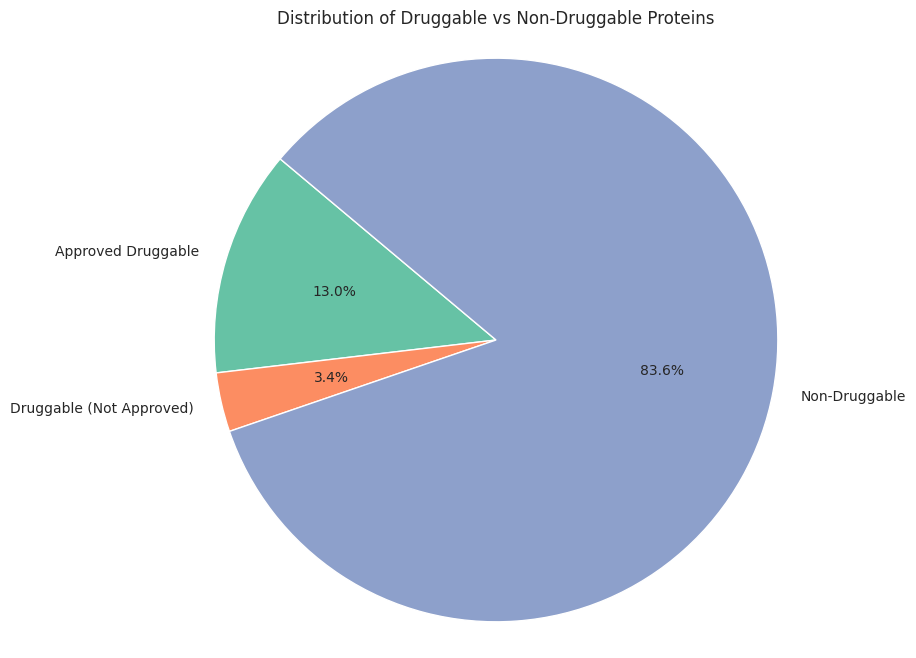

In [339]:
druggable_counts = properties['is_druggable'].value_counts()

druggable_df = properties[properties['is_druggable'] == 1]
approved_druggable_count = druggable_df['is_approved'].sum()

total_proteins = properties.shape[0]

non_druggable_count = total_proteins - druggable_counts[1]
non_approved_druggable_count = druggable_counts[1] - approved_druggable_count

# Plotting
plt.figure(figsize=(8, 8))
plt.pie([approved_druggable_count, non_approved_druggable_count, non_druggable_count], labels=['Approved Druggable', 'Druggable (Not Approved)', 'Non-Druggable'], autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Distribution of Druggable vs Non-Druggable Proteins')
plt.axis('equal')
plt.show()

<ipython-input-356-fa36d23bb09d>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data[data['is_druggable'] == 1], x=values, ax=ax[i][0],alpha = 0.7,common_norm = True, label = 'druggable')


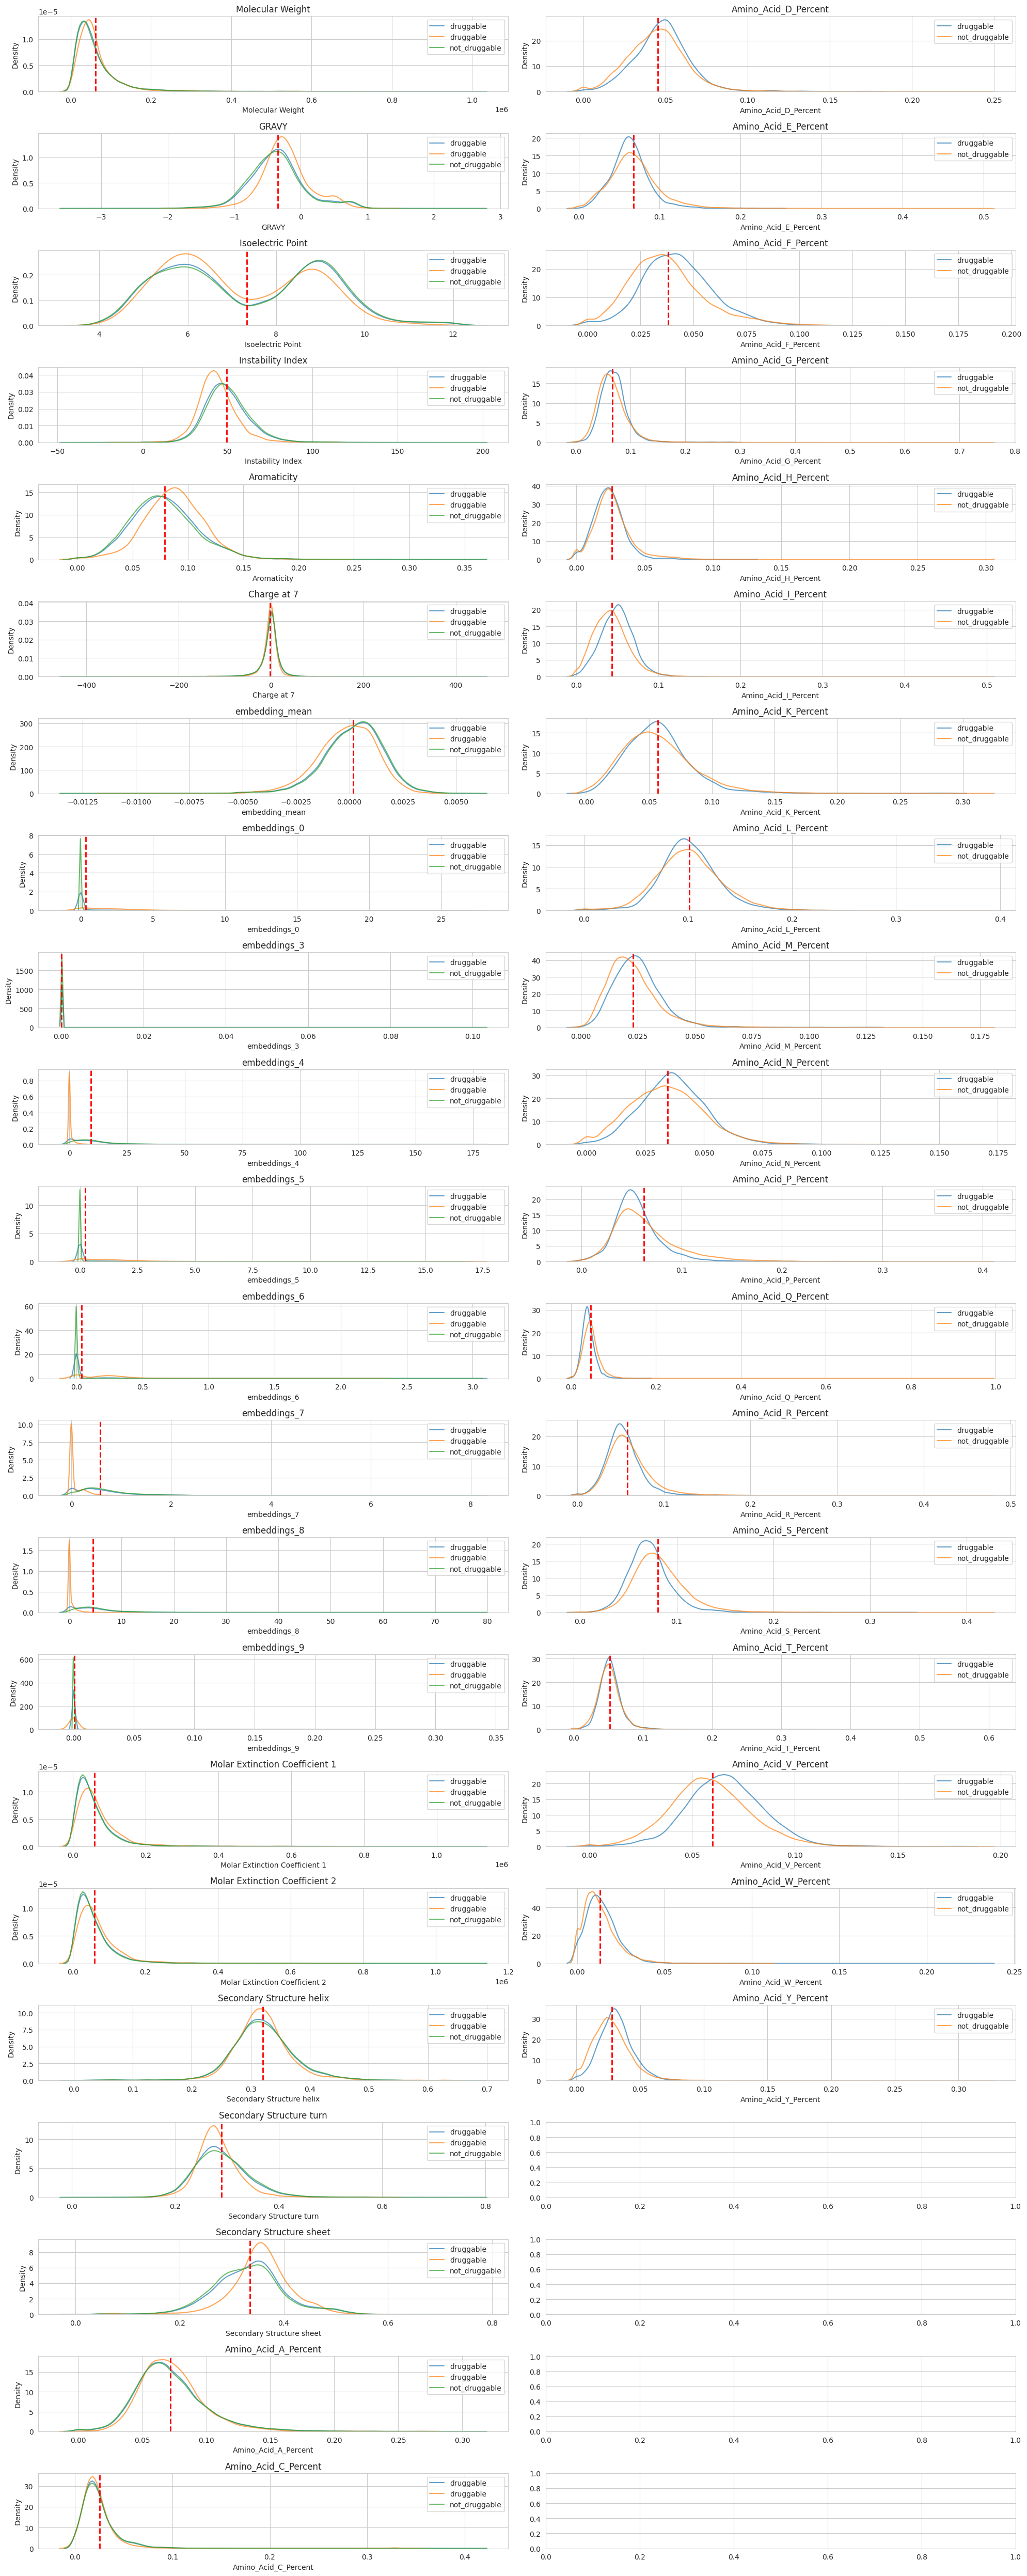

In [356]:
fig,ax = plt.subplots(figsize = (20,50),nrows = 22,ncols = 2)
okk = [i for i in data.columns if i!= "is_druggable" and i!= "is_approved"]
for i,values in enumerate(okk):
  if i <22:
    sns.kdeplot(data=data, x=values, ax=ax[i][0],alpha = 0.7,common_norm = True, label = 'druggable')
    sns.kdeplot(data=data[data['is_druggable'] == 1], x=values, ax=ax[i][0],alpha = 0.7,common_norm = True, label = 'druggable')
    sns.kdeplot(data = data[data['is_druggable'] == 0], x=values, ax=ax[i][0],alpha = 0.7,common_norm = True, label ='not_druggable')
    ax[i][0].axvline(data[values].mean(), color='red', linestyle='dashed', linewidth=2)
    ax[i][0].set_title(values)
    ax[i][0].legend()
  else:
    sns.kdeplot(data=data[data['is_druggable'] == 1], x=values, ax=ax[i-22][1],alpha = 0.7,common_norm = True,label = 'druggable')
    sns.kdeplot(data=data[data['is_druggable'] == 0], x=values, ax=ax[i-22][1],alpha = 0.7,common_norm = True,label ='not_druggable')
    ax[i-22][1].axvline(data[values].mean(), color='red', linestyle='dashed', linewidth=2)
    ax[i-22][1].set_title(values)
    ax[i-22][1].legend()

plt.tight_layout()
plt.show()

In [360]:
fig,ax = plt.subplots(figsize = (20,50), nrows = 40 )
for i,values in enumerate(okk):
  sns.boxplot(data[values], orient = 'h',ax = ax[i])
plt.tight_layout()
plt.show()

In [363]:
#scaling of data on same scale for further analysis(Z-score normalization)
std_scale = StandardScaler()
data[okk] = std_scale.fit_transform(data[okk])
data

Molecular Weight     GRAVY  Isoelectric Point  Instability Index  \
A0A087X1C5         -0.072800  0.760190           0.782941          -0.318816   
A0A0B4J2F0         -0.923385  0.251664           0.402109           0.456022   
A0A0B4J2F2          0.383305  0.338083          -0.294697           0.737113   
A0A0C5B5G6         -0.992175 -1.378626           1.673852           2.084725   
A0A0K2S4Q6         -0.665879  1.048210          -1.118990          -0.570007   
...                      ...       ...                ...                ...   
Q9UI54             -0.922166  1.502435           1.694652          -1.019198   
Q9UI72             -0.891207 -1.560714           1.150543          -0.242915   
Q9Y3F1             -0.919708  1.829755          -1.617143           1.514538   
Q9Y6C7             -0.845092  0.728456           1.631701           0.968746   
Q9Y6Z2             -0.925454 -0.179792          -0.767967           0.065820   

            Aromaticity  Charge at 7  embedding_mean  is_druggable  \
A0A087X1C5     0.206338     0.344723        0.155612             0   
A0A0B4J2F0     1.671388     0.105688       -0.876989             0   
A0A0B4J2F2    -0.509067     0.038364       -0.216114             0   
A0A0C5B5G6     5.661833     0.194116       -0.751805             0   
A0A0K2S4Q6    -0.152030    -0.067139        0.390163             0   
...                 ...          ...             ...           ...   
Q9UI54         2.196006     0.419486       -0.621858             0   
Q9UI72         0.737170     0.245617       -0.332199             0   
Q9Y3F1         3.885866    -0.028679       -0.246560             0   
Q9Y6C7         1.253404     0.357510        0.465342             0   
Q9Y6Z2         0.282003    -0.012756       -0.105217             0   

            is_approved  embeddings_0  ...  Amino_Acid_M_Percent  \
A0A087X1C5            0     -0.265206  ...             -0.140221   
A0A0B4J2F0            0     -0.292466  ...              1.275158   
A0A0B4J2F2            0      0.607357  ...             -0.454327   
A0A0C5B5G6            0     -0.292466  ...              9.216378   
A0A0K2S4Q6            0     -0.292466  ...             -0.271914   
...                 ...           ...  ...                   ...   
Q9UI54                0     -0.292466  ...             -0.427075   
Q9UI72                0     -0.292466  ...              1.856666   
Q9Y3F1                0     -0.292466  ...             -0.456386   
Q9Y6C7                0     -0.292466  ...              0.812736   
Q9Y6Z2                0     -0.292466  ...             -0.484669   

            Amino_Acid_N_Percent  Amino_Acid_P_Percent  Amino_Acid_Q_Percent  \
A0A087X1C5             -0.841826              0.479887             -0.071455   
A0A0B4J2F0             -2.208808             -1.359946              3.164360   
A0A0B4J2F2             -0.982762              0.844730              0.863328   
A0A0C5B5G6             -2.208808              0.008045              0.797251   
A0A0K2S4Q6             -0.935184              0.539982             -0.065810   
...                          ...                   ...                   ...   
Q9UI54                  1.282080             -0.804895             -2.246175   
Q9UI72                  3.356376             -1.485162             -0.129009   
Q9Y3F1                 -1.065958              0.285758             -0.507074   
Q9Y6C7                  2.557121             -0.943268             -0.174055   
Q9Y6Z2                 -2.208808              1.883823              0.316710   

            Amino_Acid_R_Percent  Amino_Acid_S_Percent  Amino_Acid_T_Percent  \
A0A087X1C5              0.884220             -1.172662             -0.179218   
A0A0B4J2F0             -0.870165             -1.598492             -0.804703   
A0A0B4J2F2              0.077129              0.197520              0.028378   
A0A0C5B5G6              5.330009             -2.969133             -2.817983   
A0A0K2S4Q6             -0.756270

<ipython-input-365-58f359f4bd07>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data[data['is_druggable'] == 1], x=values, ax=ax[i][0],alpha = 0.7,common_norm = True, label = 'druggable')


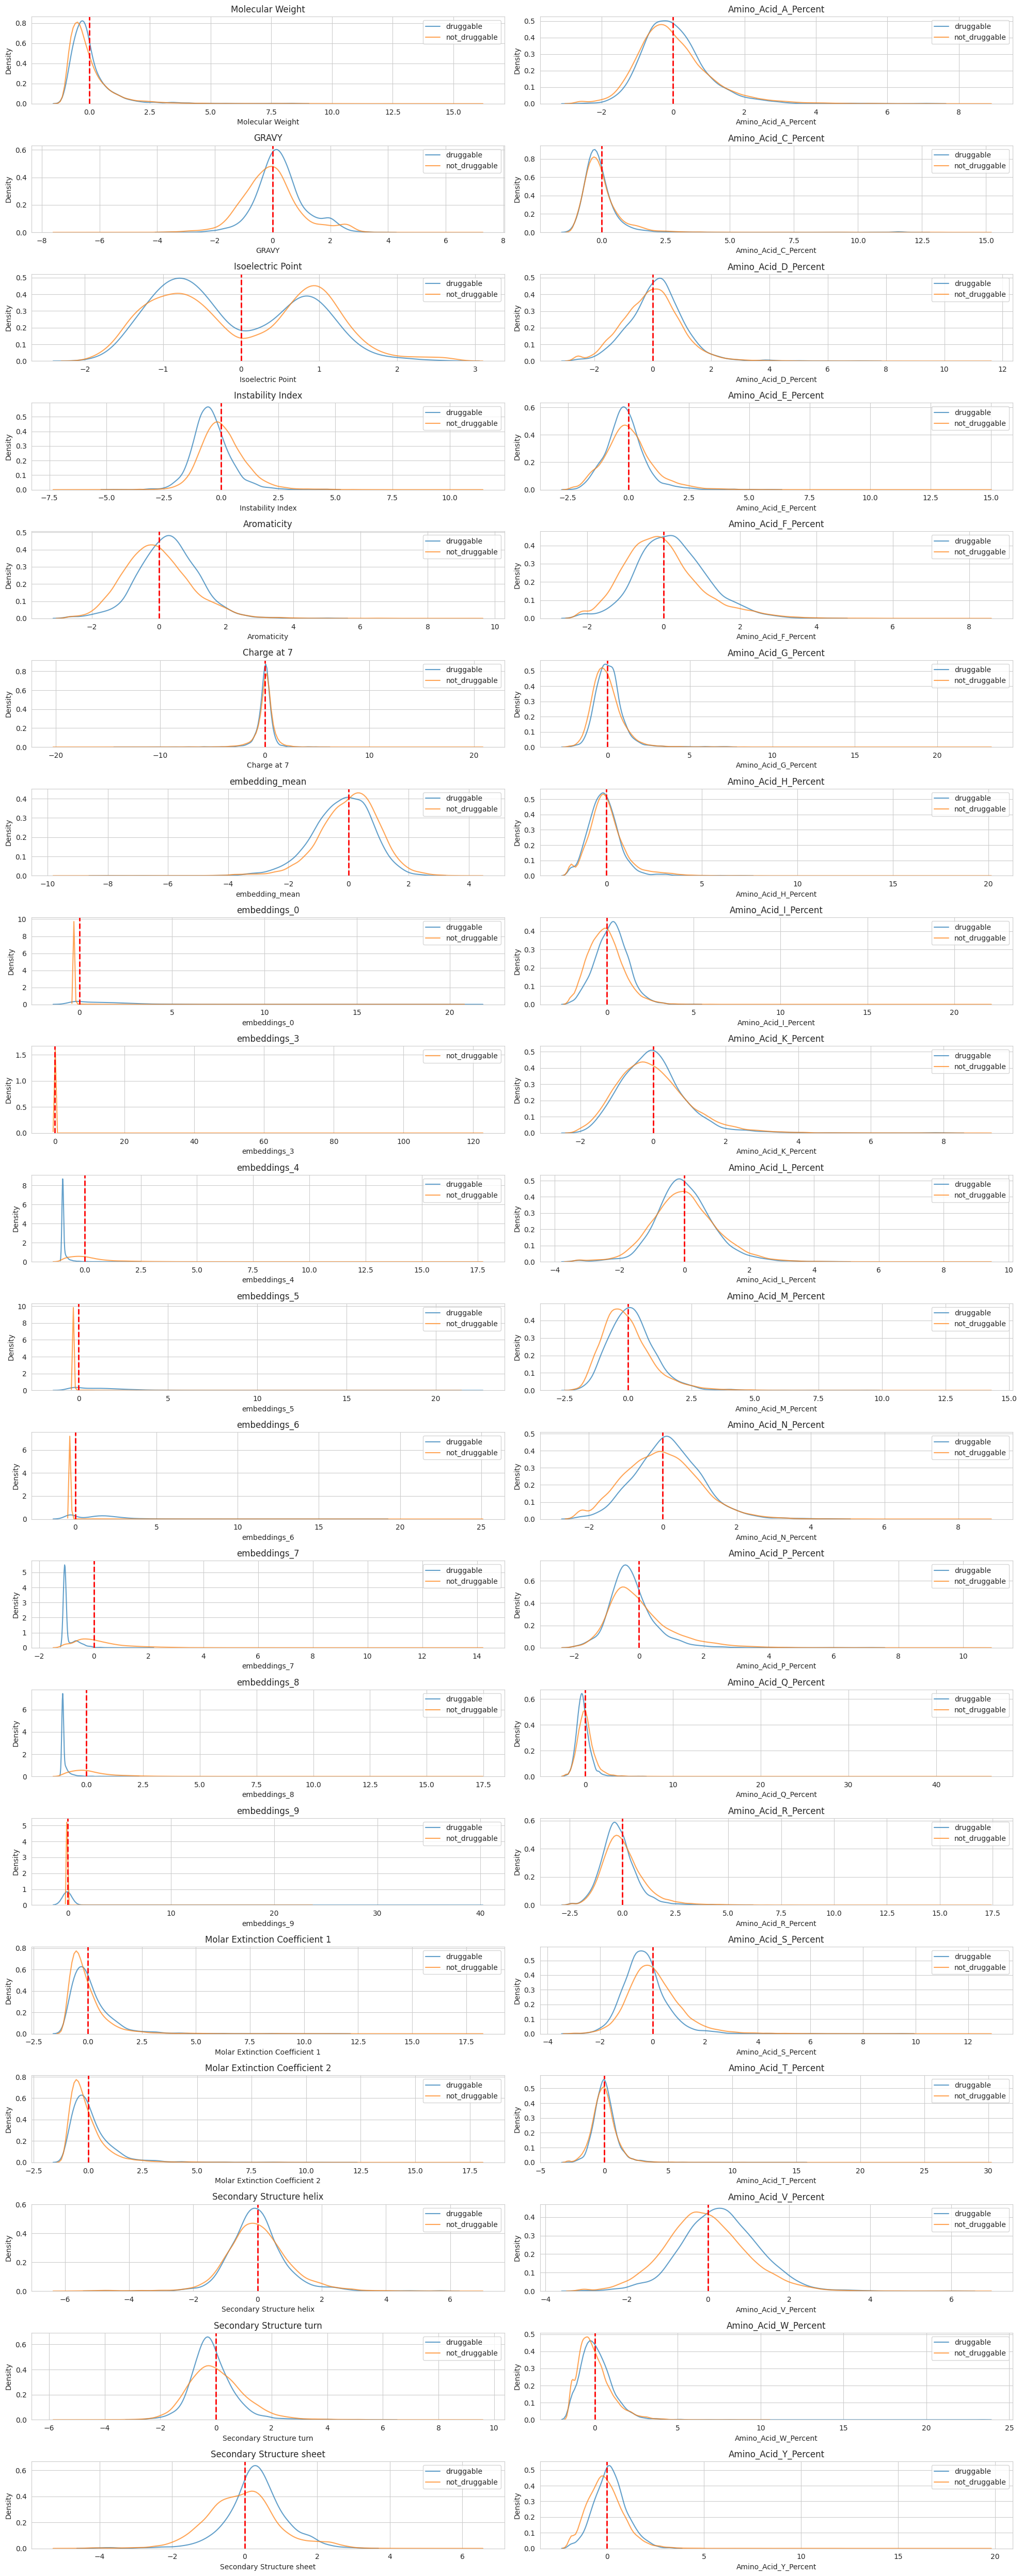

In [365]:
fig,ax = plt.subplots(figsize = (20,50),nrows = 20,ncols = 2)
for i,values in enumerate(okk):
  if i <20:
    sns.kdeplot(data=data[data['is_druggable'] == 1], x=values, ax=ax[i][0],alpha = 0.7,common_norm = True, label = 'druggable')
    sns.kdeplot(data = data[data['is_druggable'] == 0], x=values, ax=ax[i][0],alpha = 0.7,common_norm = True, label ='not_druggable')
    ax[i][0].axvline(data[values].mean(), color='red', linestyle='dashed', linewidth=2)
    ax[i][0].set_title(values)
    ax[i][0].legend()
  else:
    sns.kdeplot(data=data[data['is_druggable'] == 1], x=values, ax=ax[i-20][1],alpha = 0.7,common_norm = True,label = 'druggable')
    sns.kdeplot(data=data[data['is_druggable'] == 0], x=values, ax=ax[i-20][1],alpha = 0.7,common_norm = True,label ='not_druggable')
    ax[i-20][1].axvline(data[values].mean(), color='red', linestyle='dashed', linewidth=2)
    ax[i-20][1].set_title(values)
    ax[i-20][1].legend()

plt.tight_layout()
plt.show()

In [366]:
#lets fix imbalance in data by upsampling using SMOTE(most reliable)
#approved_drug = 13%
#not approved but druggable = 3.4%
#non_druggable = 83.6%

x = data.drop(columns = ['is_druggable','is_approved'])
y = data['is_druggable']
oversample = SMOTE()
x_up,y_up = oversample.fit_resample(x,y)
okk_1 = pd.DataFrame(x_up)
okk_2 = pd.DataFrame(y_up)
okk_1['is_druggable'] = okk_2
okk_1

Molecular Weight     GRAVY  Isoelectric Point  Instability Index  \
0             -0.072800  0.760190           0.782941          -0.318816   
1             -0.923385  0.251664           0.402109           0.456022   
2              0.383305  0.338083          -0.294697           0.737113   
3             -0.992175 -1.378626           1.673852           2.084725   
4             -0.665879  1.048210          -1.118990          -0.570007   
...                 ...       ...                ...                ...   
34169         -0.681472 -0.485203           1.731036          -0.496112   
34170         -0.375845  1.327749           0.917295          -0.875779   
34171         -0.186853 -0.219921          -0.843421          -0.502222   
34172         -0.441230 -0.751709          -1.258383          -0.569916   
34173          0.157983 -0.148253          -1.304654          -0.602023   

       Aromaticity  Charge at 7  embedding_mean  embeddings_0  embeddings_3  \
0         0.206338     0.344723        0.155612     -0.265206       -0.0118   
1         1.671388     0.105688       -0.876989     -0.292466       -0.0118   
2        -0.509067     0.038364       -0.216114      0.607357       -0.0118   
3         5.661833     0.194116       -0.751805     -0.292466       -0.0118   
4        -0.152030    -0.067139        0.390163     -0.292466       -0.0118   
...            ...          ...             ...           ...           ...   
34169    -0.344758     1.134189       -1.226481      1.555646       -0.0118   
34170     1.116724     0.474927        0.026484      0.582122       -0.0118   
34171     0.927646    -0.439527        0.272259      4.621402       -0.0118   
34172    -1.836740    -0.417132       -1.397076     -0.292466       -0.0118   
34173     0.413333    -1.519580        0.516906     -0.260984       -0.0118   

       embeddings_4  ...  Amino_Acid_N_Percent  Amino_Acid_P_Percent  \
0         -0.938163  ...             -0.841826              0.479887   
1         -0.080868  ...             -2.208808             -1.359946   
2         -0.978203  ...             -0.982762              0.844730   
3          5.587503  ...             -2.208808              0.008045   
4         -0.227741  ...             -0.935184              0.539982   
...             ...  ...                   ...                   ...   
34169     -0.978203  ...             -1.020395              0.204412   
34170     -0.978203  ...             -0.832860             -0.632200   
34171     -0.978203  ...              0.783491              0.046191   
34172     -0.571717  ...              1.457302             -1.399977   
34173     -0.867888  ...              0.298580             -0.688274   

       Amino_Acid_Q_Percent  Amino_Acid_R_Percent  Amino_Acid_S_Percent  \
0                 -0.071455              0.884220             -1.172662   
1                  3.164360             -0.870165             -1.598492   
2                  0.863328              0.077129              0.197520   
3                  0.797251              5.330009             -2.969133   
4                 -0.065810             -0.756270              0.713185   
...                     ...                   ...                   ...   
34169             -0.316515              1.209980              0.078914   
34170             -0.448804             -1.064743             -0.429748   
34171              0.015858             -0.107610             -0.556156   
34172              0.556047              0.760912             -1.051222   
34173             -0.406947             -1.108717              0.077760   

       Amino_Acid_T_Percent  Amino_Acid_V_Percent  Amino_Acid_W_Percent  \
0                 -0.179218              1.300480              0.047543   
1                 -0.804703              0.721269             -1.394428   
2                  0.028378             -0.320350             -0.581494   
3                 -2.817983             -3.054601              5.236067   
4               

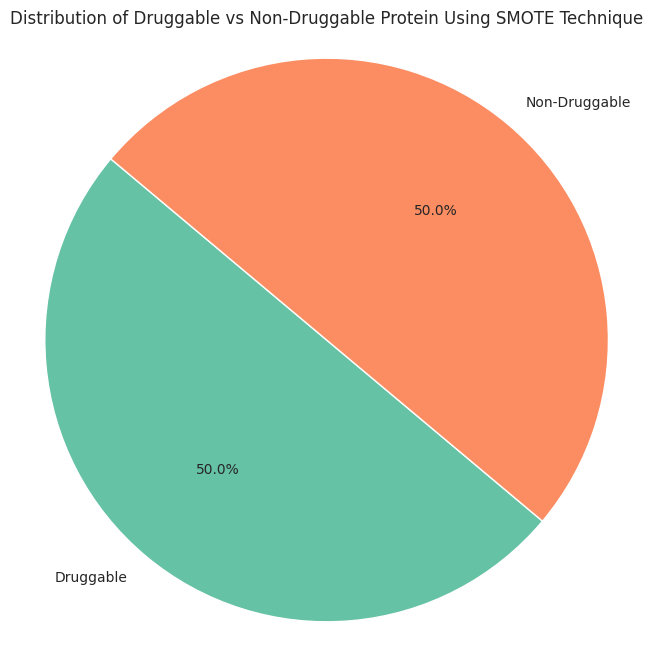

In [367]:
druggable_counts = okk_1['is_druggable'].value_counts()
druggable_count = druggable_counts[1]
non_druggable_count = druggable_counts[0]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie([druggable_count, non_druggable_count], labels=['Druggable', 'Non-Druggable'], autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribution of Druggable vs Non-Druggable Protein Using SMOTE Technique')
plt.axis('equal')
plt.show()

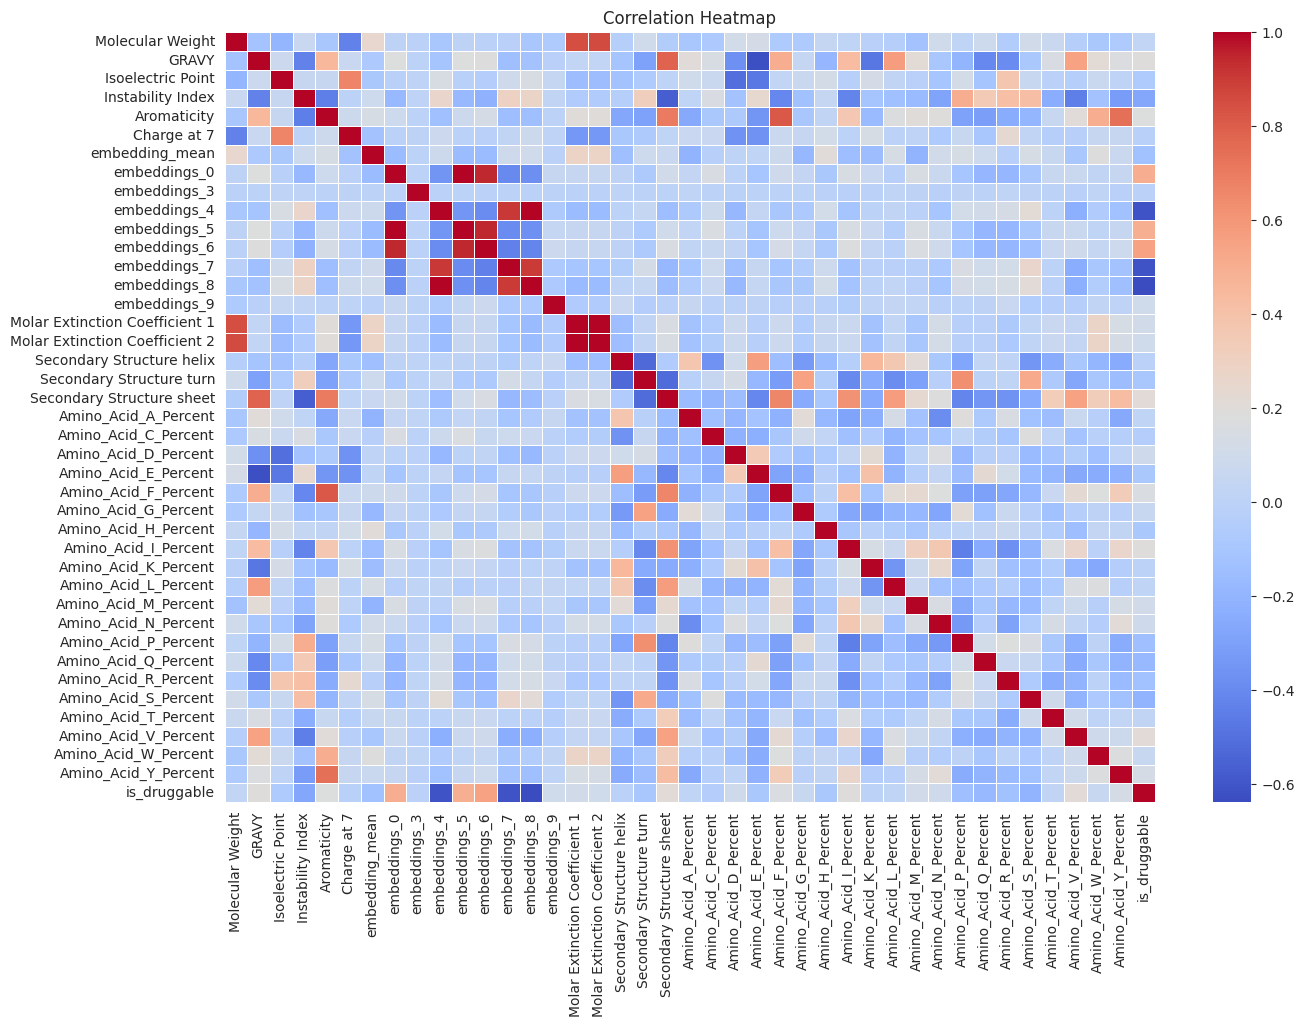

In [368]:
plt.figure(figsize=(15, 10))
sns.heatmap(okk_1.corr(), cmap='coolwarm', annot=False, fmt=".2f",linewidth= 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [381]:
okk_1.columns

Index(['Molecular Weight', 'GRAVY', 'Isoelectric Point', 'Instability Index',
       'Aromaticity', 'Charge at 7', 'embedding_mean', 'embeddings_0',
       'embeddings_3', 'embeddings_4', 'embeddings_5', 'embeddings_6',
       'embeddings_7', 'embeddings_8', 'embeddings_9',
       'Molar Extinction Coefficient 1', 'Molar Extinction Coefficient 2',
       'Secondary Structure helix', 'Secondary Structure turn',
       'Secondary Structure sheet', 'Amino_Acid_A_Percent',
       'Amino_Acid_C_Percent', 'Amino_Acid_D_Percent', 'Amino_Acid_E_Percent',
       'Amino_Acid_F_Percent', 'Amino_Acid_G_Percent', 'Amino_Acid_H_Percent',
       'Amino_Acid_I_Percent', 'Amino_Acid_K_Percent', 'Amino_Acid_L_Percent',
       'Amino_Acid_M_Percent', 'Amino_Acid_N_Percent', 'Amino_Acid_P_Percent',
       'Amino_Acid_Q_Percent', 'Amino_Acid_R_Percent', 'Amino_Acid_S_Percent',
       'Amino_Acid_T_Percent', 'Amino_Acid_V_Percent', 'Amino_Acid_W_Percent',
       'Amino_Acid_Y_Percent', 'is_druggable'],
    

In [373]:
#PCA Analysis for reduction and selection of relevant ones

n_components = 41
pca_list = []
feature_weight_list = []
for i in range(1,n_components):
  PCAmod = PCA(n_components = i)
  PCAmod.fit(okk_1)
  pca_list.append(pd.Series({
      "n" : i,
      "model" : PCAmod,
      "var" : PCAmod.explained_variance_ratio_.sum(),
  }))
  weights = PCAmod.explained_variance_ratio_.reshape(-1, 1) / PCAmod.explained_variance_ratio_.sum()
  overall_contributions = np.abs(PCAmod.components_) * weights
  abs_feature_values = overall_contributions.sum(axis=0)
  feature_weight_list.append(pd.DataFrame({
      'n': i,
      'features': okk_1.columns,
      'values': abs_feature_values / abs_feature_values.sum(),
  }))
pca_report = pd.DataFrame(pca_list)
feature_importance_report = pd.concat(feature_weight_list).pivot(index='n', columns='features', values='values')

In [374]:
pca_report

n                 model       var
0    1   PCA(n_components=1)  0.202213
1    2   PCA(n_components=2)  0.317745
2    3   PCA(n_components=3)  0.401332
3    4   PCA(n_components=4)  0.477770
4    5   PCA(n_components=5)  0.543688
5    6   PCA(n_components=6)  0.597463
6    7   PCA(n_components=7)  0.645594
7    8   PCA(n_components=8)  0.685166
8    9   PCA(n_components=9)  0.717439
9   10  PCA(n_components=10)  0.745794
10  11  PCA(n_components=11)  0.769667
11  12  PCA(n_components=12)  0.791805
12  13  PCA(n_components=13)  0.810963
13  14  PCA(n_components=14)  0.829830
14  15  PCA(n_components=15)  0.847660
15  16  PCA(n_components=16)  0.863458
16  17  PCA(n_components=17)  0.878748
17  18  PCA(n_components=18)  0.893483
18  19  PCA(n_components=19)  0.907600
19  20  PCA(n_components=20)  0.921233
20  21  PCA(n_components=21)  0.934216
21  22  PCA(n_components=22)  0.946263
22  23  PCA(n_components=23)  0.957517
23  24  PCA(n_components=24)  0.968601
24  25  PCA(n_components=25)  0.977567
25  26  PCA(n_components=26)  0.984155
26  27  PCA(n_components=27)  0.987758
27  28  PCA(n_components=28)  0.990992
28  29  PCA(n_components=29)  0.993748
29  30  PCA(n_components=30)  0.996043
30  31  PCA(n_components=31)  0.998195
31  32  PCA(n_components=32)  0.999916
32  33  PCA(n_components=33)  0.999965
33  34  PCA(n_components=34)  0.999999
34  35  PCA(n_components=35)  1.000000
35  36  PCA(n_components=36)  1.000000
36  37  PCA(n_components=37)  1.000000
37  38  PCA(n_components=38)  1.000000
38  39  PCA(n_components=39)  1.000000
39  40  PCA(n_components=40)  1.000000

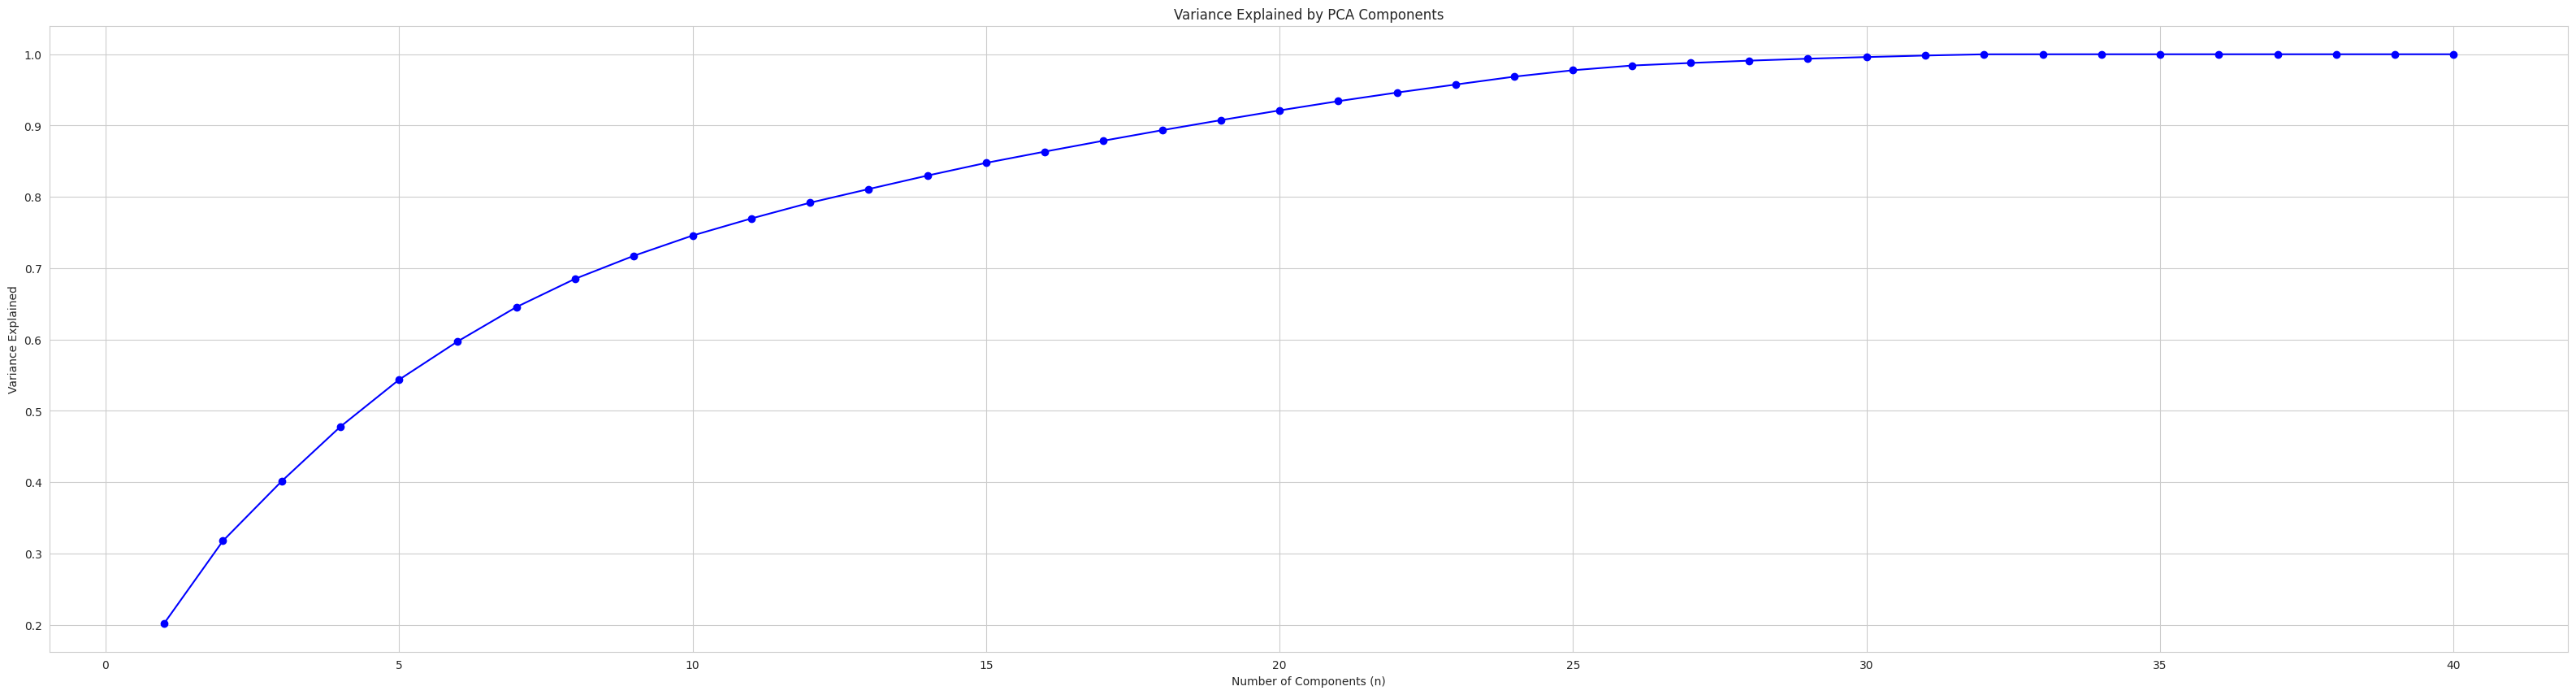

In [375]:
fig,ax = plt.subplots(figsize = (40,10))
plt.plot(pca_report['n'], pca_report['var'], marker = 'o', linestyle = "-", color = 'b')
plt.title('Variance Explained by PCA Components')
# plt.axvline(x=150, color='r', linestyle='--', linewidth=2, label='Threshold at x=50')
plt.xlabel('Number of Components (n)')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

[Text(0.5, 0, 'Number of components'),
 Text(0, 0.5, 'Relative Importance'),
 Text(0.5, 1.0, 'Feature Importance Vs Dimensions')]

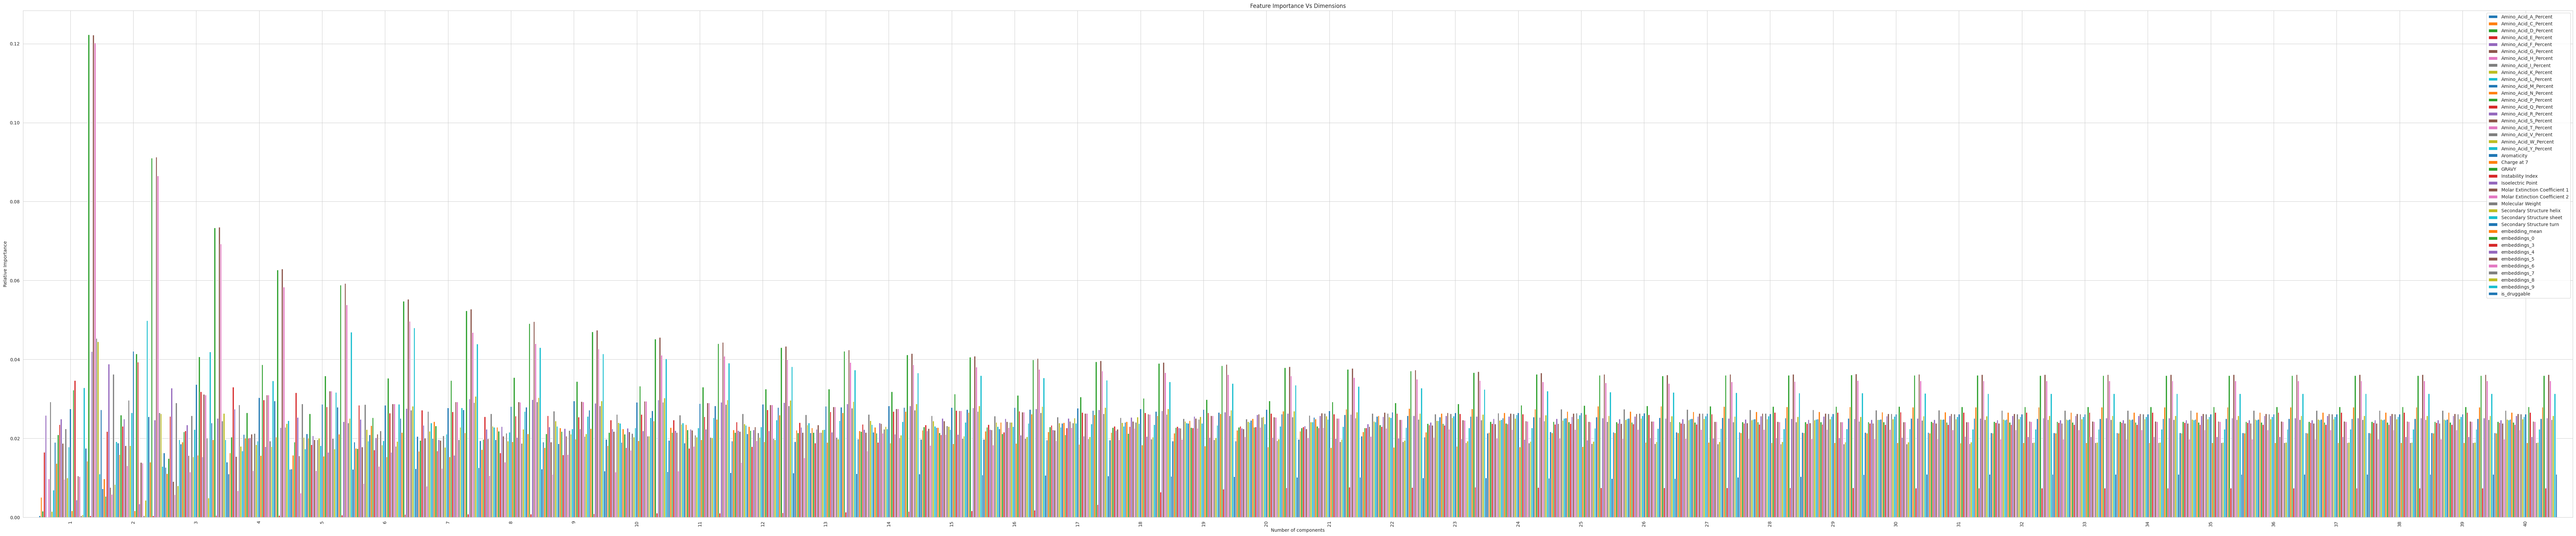

In [378]:
ax = feature_importance_report.plot(kind = 'bar' , figsize = (100,20), width=1)
ax.legend(loc = 'upper right')
ax.set(xlabel = 'Number of components' ,  ylabel = 'Relative Importance' , title = 'Feature Importance Vs Dimensions')

<Figure size 2000x1200 with 0 Axes>

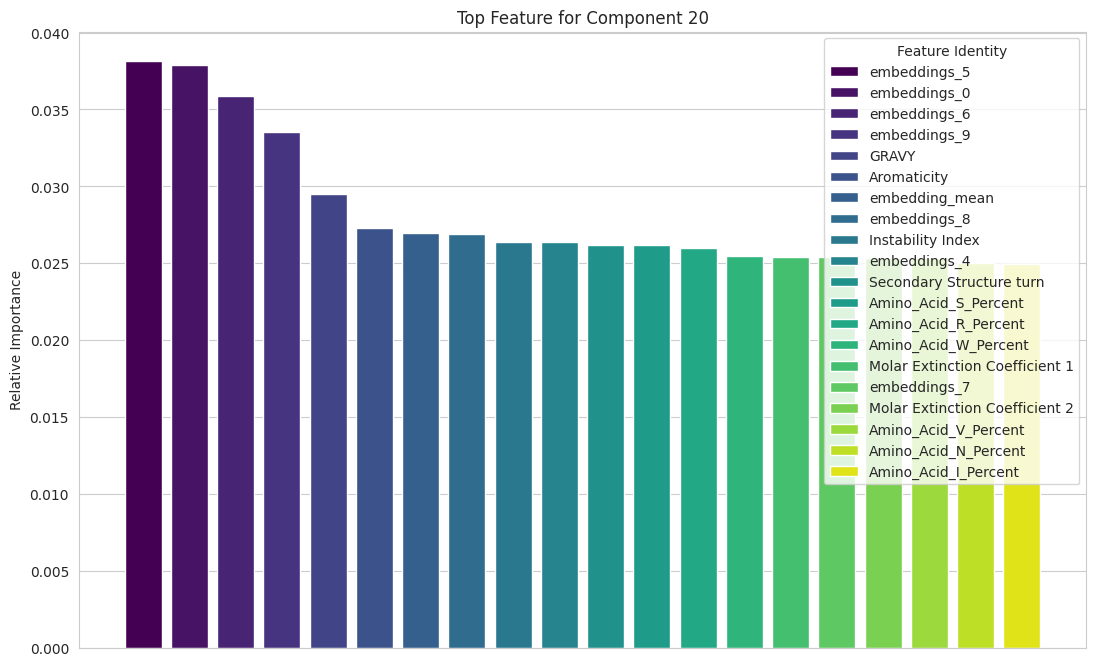

In [379]:
plt.figure(figsize= (20,12))
n_top_features = 20
top_features = feature_importance_report.iloc[19].nlargest(n_top_features)
fig, ax = plt.subplots(figsize=(13, 8))

for idx, (feature, importance) in enumerate(top_features.items()):
    ax.bar(idx, importance, label=feature, color=plt.cm.viridis(idx / len(top_features)))

ax.set_xticks([])

ax.legend(loc='upper right', title='Feature Identity')

ax.set(ylabel='Relative Importance', title='Top Feature for Component 20')
plt.show()

<Figure size 2000x1200 with 0 Axes>

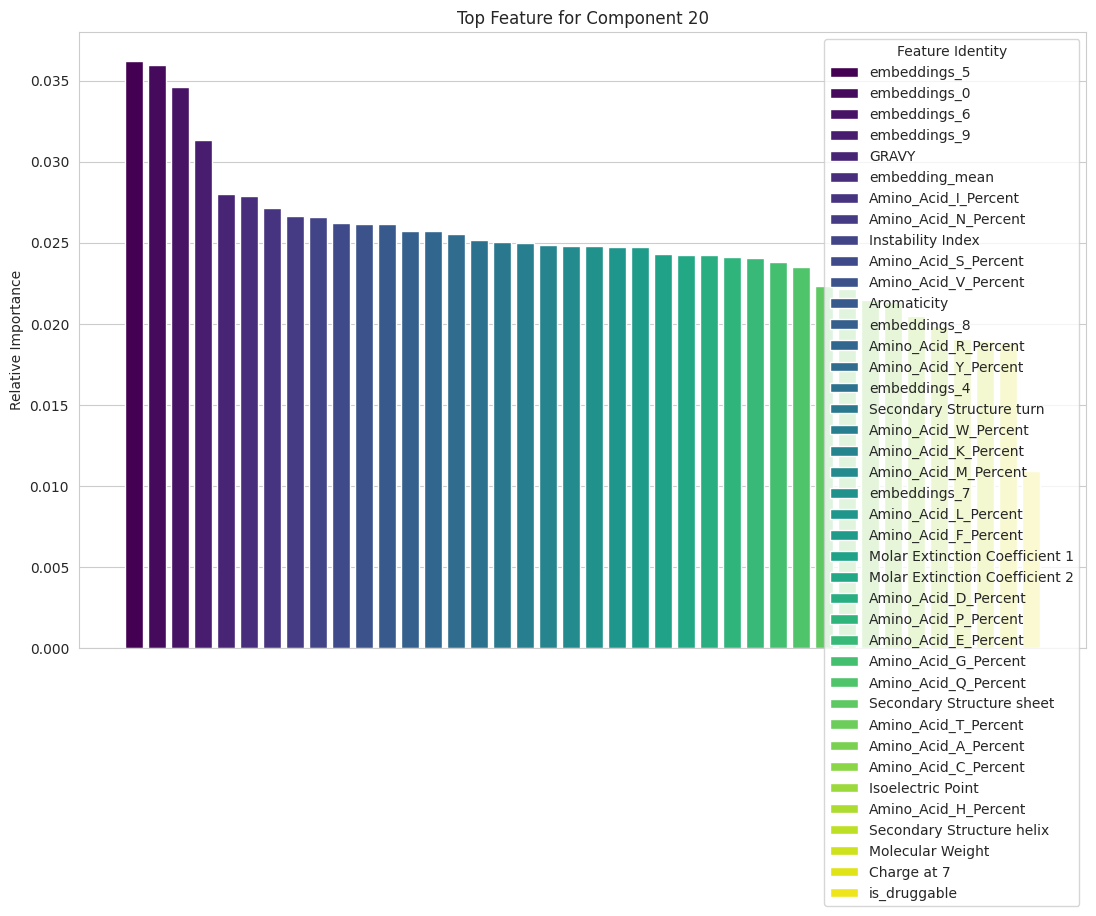

In [380]:
plt.figure(figsize= (20,12))
n_top_features = 40
top_features = feature_importance_report.iloc[39].nlargest(n_top_features)
fig, ax = plt.subplots(figsize=(13, 8))

for idx, (feature, importance) in enumerate(top_features.items()):
    ax.bar(idx, importance, label=feature, color=plt.cm.viridis(idx / len(top_features)))

ax.set_xticks([])

ax.legend(loc='upper right', title='Feature Identity')

ax.set(ylabel='Relative Importance', title='Top Feature for Component 20')
plt.show()

embeddings_3                      0.000000
embeddings_9                      0.005002
Amino_Acid_H_Percent              0.006600
GRAVY                             0.006759
Amino_Acid_W_Percent              0.006797
embedding_mean                    0.006991
Instability Index                 0.007041
Amino_Acid_D_Percent              0.007088
Amino_Acid_E_Percent              0.007140
Amino_Acid_V_Percent              0.007213
Amino_Acid_I_Percent              0.007225
Amino_Acid_T_Percent              0.007226
Charge at 7                       0.007288
Isoelectric Point                 0.007295
Molar Extinction Coefficient 2    0.007298
Secondary Structure helix         0.007335
Amino_Acid_S_Percent              0.007386
Amino_Acid_P_Percent              0.007428
Amino_Acid_M_Percent              0.007430
Amino_Acid_R_Percent              0.007431
Amino_Acid_C_Percent              0.007488
Amino_Acid_L_Percent              0.007496
Secondary Structure turn          0.007683
Amino_Acid_

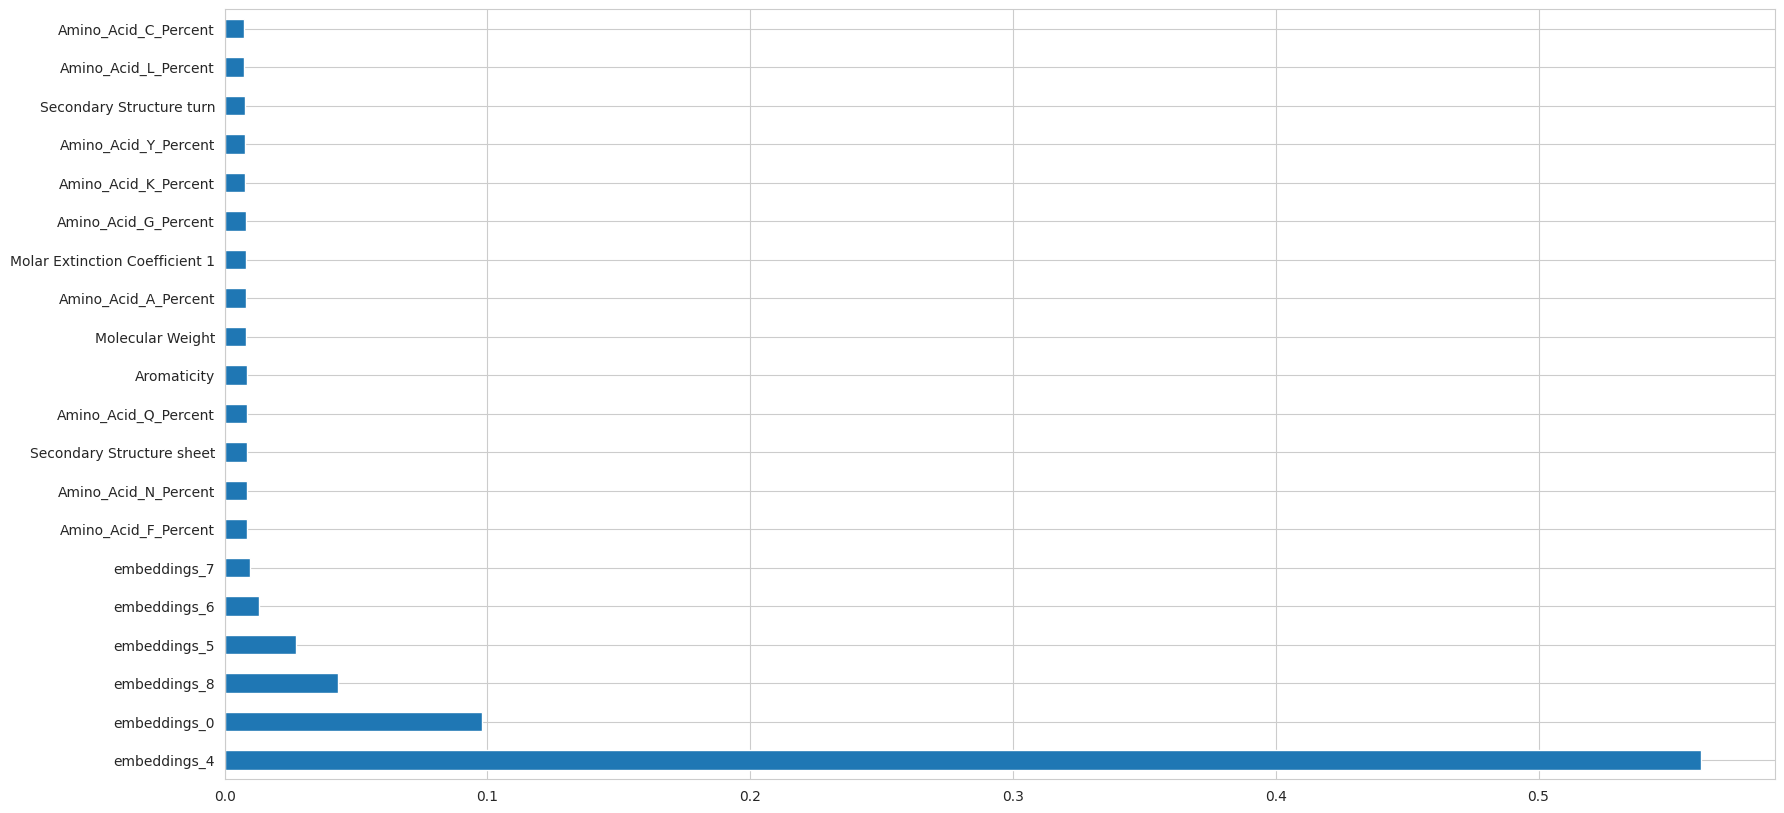

In [382]:
#lets see each feature importance using XGB Classifier
import xgboost

x_sample = okk_1.drop(columns = ['is_druggable'])
y_sample = okk_1['is_druggable']

model = xgboost.XGBClassifier()
model.fit(x_sample,y_sample)

feat_imp = pd.Series(model.feature_importances_, index=x_sample.columns)
print(feat_imp.sort_values())
feat_imp.nlargest(20).plot(kind='barh',figsize=(20,10))

plt.show()

In [383]:
#model building
X_train,X_test,y_train,y_test = train_test_split(x_sample,y_sample, test_size = 0.2, random_state = 123)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#using xgboost boosting algorithms
model_1 = xgboost.XGBClassifier()
model_1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [384]:
def test_results(y_pred, y_test):
  results = {}
  results['Accuracy'] = accuracy_score(y_test,y_pred)
  results['Precision'] = precision_score(y_test,y_pred,average = 'weighted')
  results['Recall'] = recall_score(y_test,y_pred,average = 'weighted')
  results['F1_Score'] = f1_score(y_test,y_pred,average = 'weighted')

  cm = confusion_matrix(y_test,y_pred)
  return results,cm

In [385]:
y_pred = model_1.predict(X_test)
metrics_1,cm_1 = test_results(y_pred, y_test)

In [388]:
#using logistic regression algorithm
model_2 = LogisticRegression()
model_2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [389]:
y_pred_2 = model_2.predict(X_test)
metrics_2, cm_2 = test_results(y_pred_2, y_test)

In [392]:
#using SVM algorithm using various kernels
model_3 = svm.SVC(kernel = 'linear',probability = True)
model_4 = svm.SVC(kernel = 'poly',probability = True)
model_5 = svm.SVC(kernel = 'rbf',probability = True)

model_3.fit(X_train,y_train)
model_4.fit(X_train,y_train)
model_5.fit(X_train,y_train)

SVC(probability=True)

In [393]:
y_pred_3 = model_3.predict(X_test)
metrics_3, cm_3 = test_results(y_pred_3, y_test)

y_pred_4 = model_4.predict(X_test)
metrics_4, cm_4 = test_results(y_pred_4, y_test)

y_pred_5 = model_3.predict(X_test)
metrics_5, cm_5 = test_results(y_pred_5, y_test)

In [394]:
#using RandomForest with estimator = 1500 which is no of trees employed
model_6 = RandomForestClassifier(n_estimators = 1500, criterion = 'entropy', random_state = 42)
model_6.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1500, random_state=42)

In [395]:
y_pred_6 = model_6.predict(X_test)
metrics_6,cm_6 = test_results(y_pred_6,y_test)

In [400]:
#using ANN for classification

import tensorflow as tf
from tensorflow.keras import layers

model_7 = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [401]:
history = model_7.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 50)

Epoch 1/50
855/855 [==============================] - 5s 3ms/step - loss: 0.2776 - accuracy: 0.8838 - val_loss: 0.2285 - val_accuracy: 0.9097
Epoch 2/50
855/855 [==============================] - 3s 4ms/step - loss: 0.2320 - accuracy: 0.9113 - val_loss: 0.2193 - val_accuracy: 0.9146
Epoch 3/50
855/855 [==============================] - 5s 5ms/step - loss: 0.2204 - accuracy: 0.9153 - val_loss: 0.2150 - val_accuracy: 0.9125
Epoch 4/50
855/855 [==============================] - 3s 3ms/step - loss: 0.2069 - accuracy: 0.9229 - val_loss: 0.2038 - val_accuracy: 0.9228
Epoch 5/50
855/855 [==============================] - 3s 3ms/step - loss: 0.1953 - accuracy: 0.9270 - val_loss: 0.2032 - val_accuracy: 0.9225
Epoch 6/50
855/855 [==============================] - 3s 3ms/step - loss: 0.1837 - accuracy: 0.9319 - val_loss: 0.1952 - val_accuracy: 0.9282
Epoch 7/50
855/855 [==============================] - 4s 4ms/step - loss: 0.1694 - accuracy: 0.9391 - val_loss: 0.1908 - val_accuracy: 0.9308
Epoch 

In [402]:
y_pred_7 = model_7.predict(X_test)
y_pred_7 = (y_pred_7 >= 0.5).astype(int)
metrics_7,cm_7 = test_results(y_pred_7,y_test)

214/214 [==============================] - 1s 3ms/step


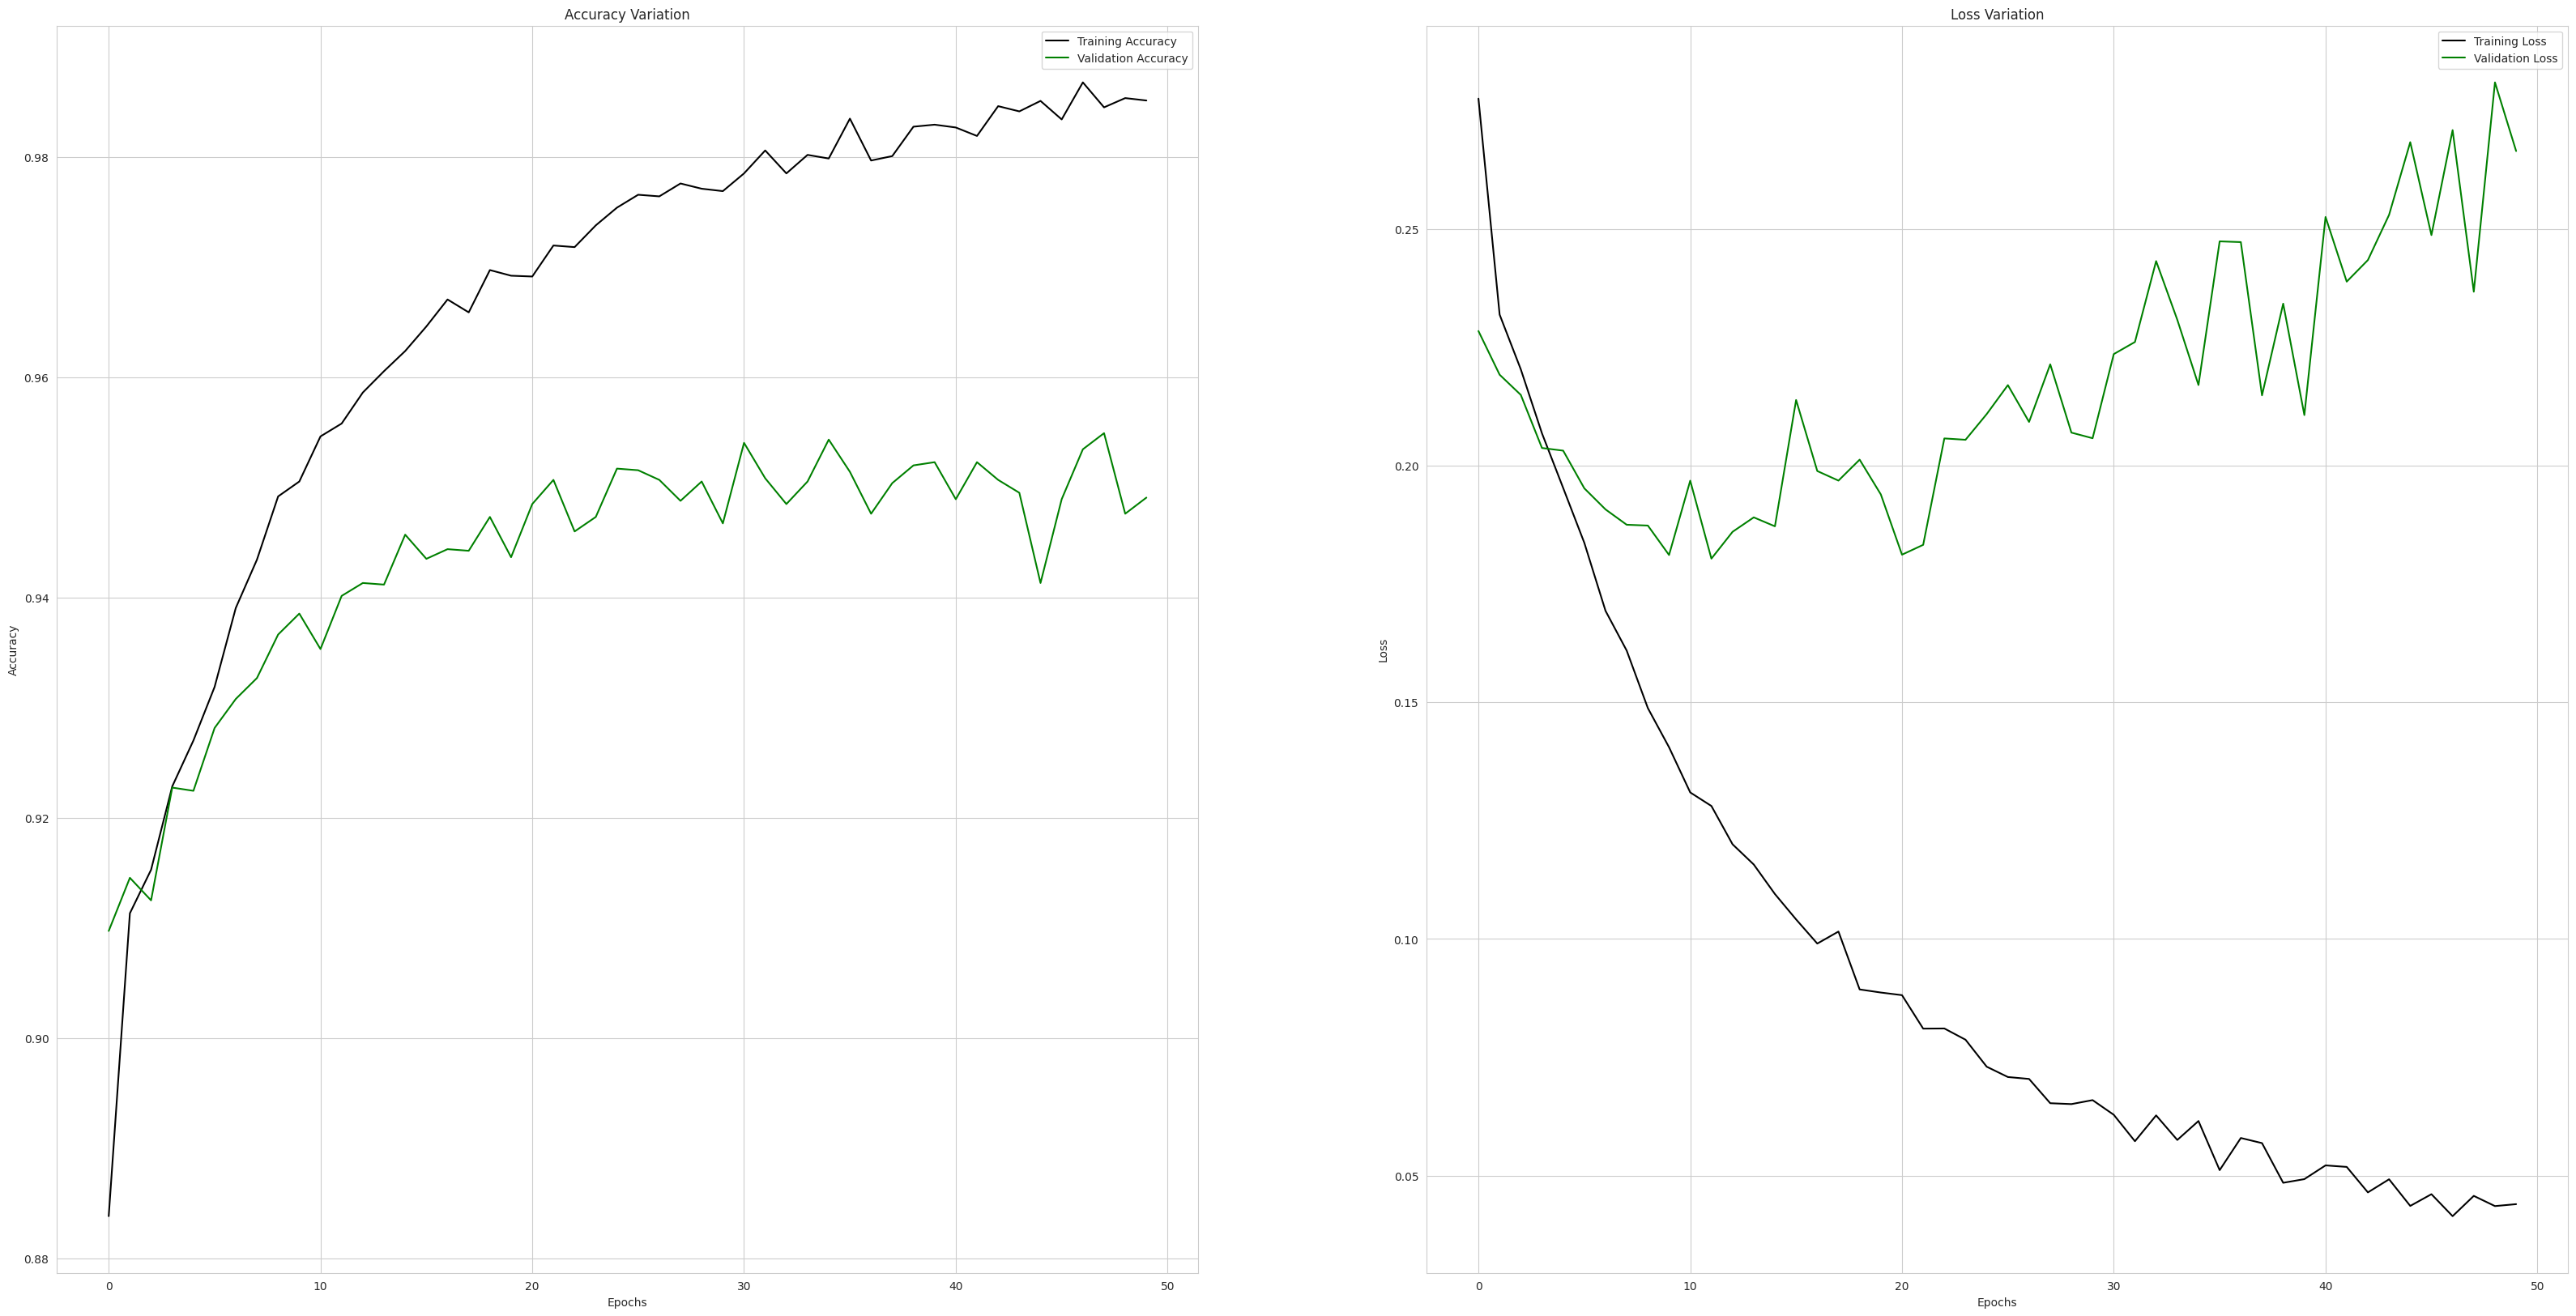

In [403]:
fig,ax = plt.subplots(figsize = (40,20), ncols = 2)
ax[0].plot(history.history['accuracy'],color = 'black', label = 'Training Accuracy')
ax[0].plot(history.history['val_accuracy'],color = 'green', label = 'Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Accuracy Variation')
ax[0].legend()

ax[1].plot(history.history['loss'],color = 'black', label = 'Training Loss')
ax[1].plot(history.history['val_loss'],color = 'green', label = 'Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_title('Loss Variation')
ax[1].legend()
plt.show()

In [404]:
model_list = {
    "XGBoost" : pd.Series(metrics_1),
    "Logistic_Regression" : pd.Series(metrics_2),
    "SVM_Linear" : pd.Series(metrics_3),
    "SVM_Polynomial" : pd.Series(metrics_4),
    "SVM_RBF" : pd.Series(metrics_5),
    "Random_Forest" : pd.Series(metrics_6),
    "ANN" : pd.Series(metrics_7)
}

pd.DataFrame(model_list).T


Accuracy  Precision    Recall  F1_Score
XGBoost              0.941331   0.941637  0.941331  0.941310
Logistic_Regression  0.906803   0.907084  0.906803  0.906768
SVM_Linear           0.908413   0.909775  0.908413  0.908296
SVM_Polynomial       0.916898   0.917594  0.916898  0.916838
SVM_RBF              0.908413   0.909775  0.908413  0.908296
Random_Forest        0.947769   0.947844  0.947769  0.947762
ANN                  0.949086   0.949994  0.949086  0.949044

<ipython-input-405-cb14ed04e3bd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = okk[1], y = okk[0], data = okk, palette='viridis')


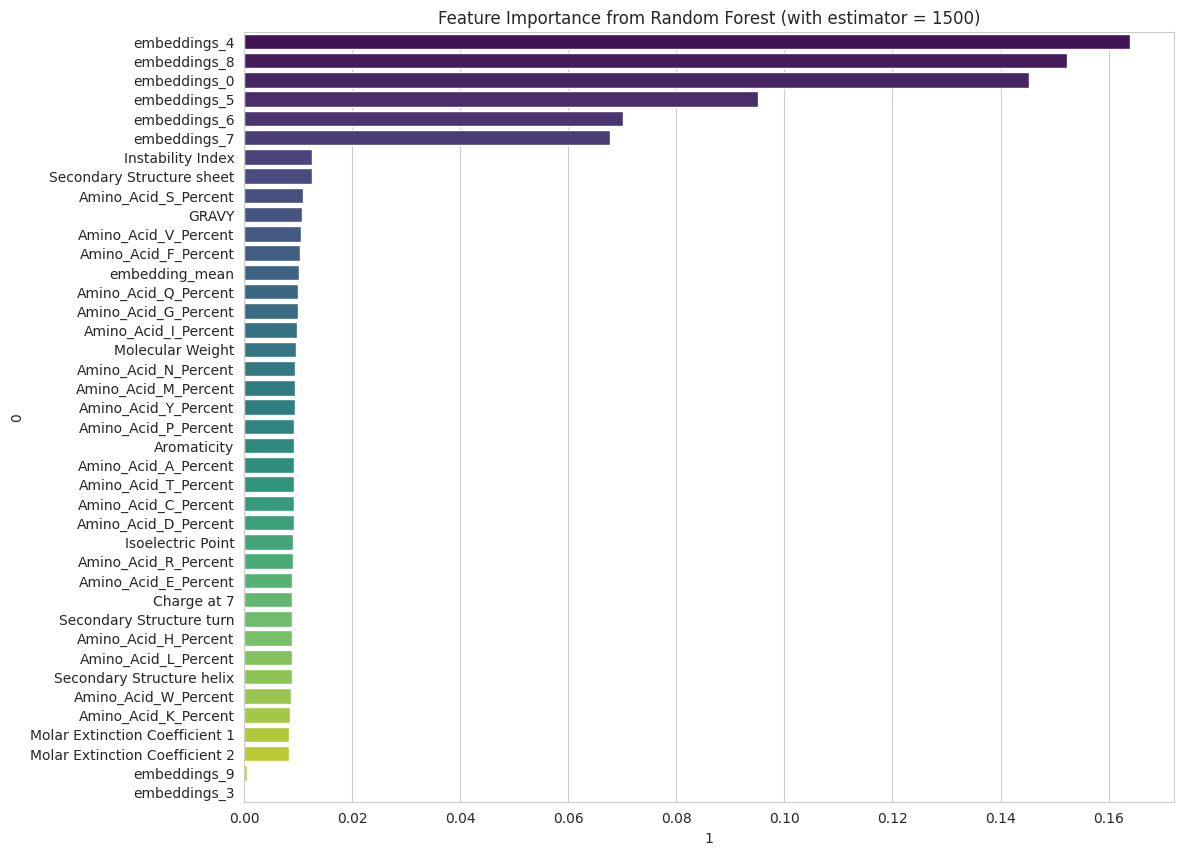

In [405]:
feature_importance = model_6.feature_importances_
okk = pd.DataFrame([x_sample.columns, feature_importance]).T
okk = okk.sort_values(by = 1,ascending = False)
plt.figure(figsize=(12, 10))
sns.barplot(x = okk[1], y = okk[0], data = okk, palette='viridis')
plt.title("Feature Importance from Random Forest (with estimator = 1500)")
plt.show()

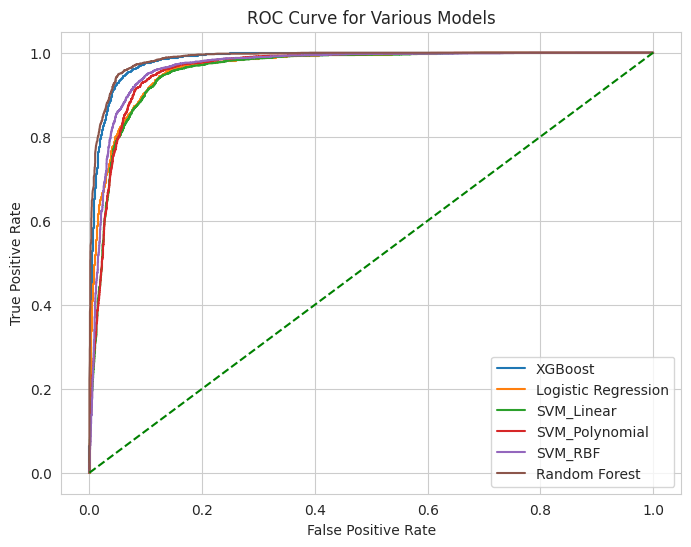

In [406]:
#roc-auc curve for various algorithm
fpr_1, tpr_1, _ = roc_curve(y_test, model_1.predict_proba(X_test)[:, 1])
fpr_2, tpr_2, _ = roc_curve(y_test, model_2.predict_proba(X_test)[:, 1])
fpr_3, tpr_3, _ = roc_curve(y_test, model_3.predict_proba(X_test)[:, 1])
fpr_4, tpr_4, _ = roc_curve(y_test, model_4.predict_proba(X_test)[:, 1])
fpr_5, tpr_5, _ = roc_curve(y_test, model_5.predict_proba(X_test)[:, 1])
fpr_6, tpr_6, _ = roc_curve(y_test, model_6.predict_proba(X_test)[:, 1])

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, label='XGBoost')
plt.plot(fpr_2, tpr_2, label='Logistic Regression')
plt.plot(fpr_3, tpr_3, label='SVM_Linear')
plt.plot(fpr_4, tpr_4, label='SVM_Polynomial')
plt.plot(fpr_5, tpr_5, label='SVM_RBF')
plt.plot(fpr_6, tpr_6, label='Random Forest')


# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Various Models')
plt.legend()
plt.show()

In [433]:
# import copy

# def evaluate_classifier(features, labels):
#     X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
#     clf = RandomForestClassifier(n_estimators=100, random_state=42)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     return accuracy_score(y_test, y_pred)

# def evaluate_feature_set(feature_set, dataset):
#     features = dataset[feature_set]
#     labels = dataset['is_druggable']
#     return evaluate_classifier(features, labels)

# def evaluate_best_feature_subset(C, S, D):
#     return evaluate_feature_set(S, D)

# def update_feature_subset(S, best_feature):
#     S.append(best_feature)

# def iwssr(D, C, F):
#     best_feature_subset = []
#     best_feature_subset_score = 0

#     for i in range(len(F)):
#         best = None
#         if len(best_feature_subset) == 0:
#             S_sel = [F[i]]
#             feature_score = evaluate_feature_set(S_sel, D)
#             if feature_score > best_feature_subset_score:
#                 best = F[i]
#                 best_feature_subset_score = feature_score
#         else:
#             for j in range(len(best_feature_subset)):
#                 S_sel = copy.deepcopy(best_feature_subset)
#                 S_sel[j] = F[i]
#                 feature_score = evaluate_feature_set(S_sel, D)

#                 if feature_score > best_feature_subset_score:
#                     best = F[i]
#                     best_feature_subset_score = feature_score

#         if best is not None:
#             best_feature_subset.append(best)

#     return best_feature_subset

# # Example usage:
# # Assume dataset is a pandas DataFrame containing features and labels
# # D = dataset
# # C = RandomForestClassifier
# # F = list of features

# best_features = iwssr(okk_1, RandomForestClassifier(), list(okk_1.columns[:-1]))
# print("Best feature subset:", best_features)


In [434]:
properties

Molecular Weight     GRAVY Isoelectric Point Instability Index  \
A0A087X1C5       57488.0269 -0.016117          8.703506         45.155922   
A0A0B4J2F0        6313.3024 -0.235185           8.03542         55.518519   
A0A0B4J2F2       84929.1856 -0.197957          6.813029         59.277803   
A0A0C5B5G6        2174.5917   -0.9375         10.266413         77.300625   
A0A0K2S4Q6       21805.9293   0.10796          5.366988         41.796517   
...                     ...       ...               ...               ...   
Q9UI54             6386.613  0.303636         10.302902         35.789091   
Q9UI72            8249.2539 -1.015942          9.348383         46.171014   
Q9Y3F1            6534.5215  0.444643          4.493088            69.675   
Q9Y6C7           11023.7471 -0.029787         10.192468         62.375638   
Q9Y6Z2            6188.8293 -0.421053          5.982781              50.3   

           Aromaticity                                        Flexibility  \
A0A087X1C5    0.085437  [0.977440476190476, 0.9806071428571421, 0.9983...   
A0A0B4J2F0     0.12963  [0.982095238095238, 0.95625, 0.983214285714285...   
A0A0B4J2F2    0.063857  [1.00125, 0.970071428571428, 1.034523809523809...   
A0A0C5B5G6        0.25  [0.9704047619047621, 1.00345238095238, 0.95860...   
A0A0K2S4Q6    0.074627  [1.008285714285714, 0.9868928571428571, 0.991,...   
...                ...                                                ...   
Q9UI54        0.145455  [0.9746904761904761, 1.00325, 0.98202380952380...   
Q9UI72        0.101449  [1.006333333333333, 0.9435238095238091, 0.9573...   
Q9Y3F1        0.196429  [0.988154761904761, 0.9863214285714281, 0.9781...   
Q9Y6C7        0.117021  [0.9616666666666661, 1.001988095238095, 0.9683...   
Q9Y6Z2        0.087719  [1.00745238095238, 0.9976309523809521, 0.97805...   

           Charge at 7  embedding_mean  is_druggable  is_approved  ...  \
A0A087X1C5    5.889114        0.000403             0            0  ...   
A0A0B4J2F0    0.510326       -0.001044             0            0  ...   
A0A0B4J2F2   -1.004586       -0.000118             0            0  ...   
A0A0C5B5G6    2.500138       -0.000869             0            0  ...   
A0A0K2S4Q6   -3.378625        0.000732             0            0  ...   
...                ...             ...           ...          ...  ...   
Q9UI54        7.571427       -0.000687             0            0  ...   
Q9UI72        3.659009       -0.000281             0            0  ...   
Q9Y3F1         -2.5132       -0.000161             0            0  ...   
Q9Y6C7        6.176832        0.000837             0            0  ...   
Q9Y6Z2       -2.154883        0.000038             0            0  ...   

            Amino_Acid_M_Percent  Amino_Acid_N_Percent  Amino_Acid_P_Percent  \
A0A087X1C5              0.021359              0.021359              0.077670   
A0A0B4J2F0              0.037037              0.000000              0.018519   
A0A0B4J2F2              0.017880              0.019157              0.089400   
A0A0C5B5G6              0.125000              0.000000              0.062500   
A0A0K2S4Q6              0.019900              0.019900              0.079602   
...                          ...                   ...                   ...   
Q9UI54                  0.018182              0.054545              0.036364   
Q9UI72                  0.043478              0.086957              0.014493   
Q9Y3F1                  0.017857              0.017857              0.071429   
Q9Y6C7                  0.031915              0.074468              0.031915   
Q9Y6Z2                  0.017544              0.000000              0.122807   

            Amino_Acid_Q_Percent  Amino_Acid_R_Percent  Amino_Acid_S_Percent  \
A0A087X1C5              0.044660              0.079612              0.048544   
A0A0B4J2F0              0.111111              0.037037              0.037037   
A0A0B4J2F2              0.063857              0.060026              0.0